# RETO 3: Análisis de Datos COVID-19 en Colombia

## Contexto del Problema

En este reto vas a analizar datos reales de casos positivos de COVID-19 en Colombia. El dataset contiene más de 6 millones de registros con 23 variables que incluyen información demográfica, geográfica, temporal y clínica.

**Objetivo:** Realizar un análisis de datos completo y profesional que permita:
- Comprender los patrones epidemiológicos de COVID-19 en Colombia
- Identificar grupos de riesgo y zonas críticas
- Detectar anomalías y valores atípicos
- Generar conclusiones accionables para la toma de decisiones en salud pública

**Dataset:** `Casos_positivos_de_COVID-19_en_Colombia._20260112.csv`

---
## 1. Importación de Librerías

**Instrucciones:**
- Importa las librerías necesarias para análisis de datos: pandas, numpy
- Importa librerías de visualización: matplotlib, seaborn, plotly
- Importa librerías de estadística: scipy.stats
- Importa librerías de machine learning: sklearn (StandardScaler, PCA, KMeans, IsolationForest)
- Configura warnings y estilos de visualización

In [8]:
#CAGAR DE LIBRERÍAS COMUNES PARA ANÁLISIS DE DATOS
try:
    import pandas as pd
    import numpy as np

    import matplotlib.pyplot as plt
    import seaborn as sns
    import plotly.express as px

    from scipy import stats

    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.cluster import KMeans
    from sklearn.ensemble import IsolationForest

    import warnings
    warnings.filterwarnings("ignore")

    plt.style.use("seaborn-v0_8")
    sns.set_theme()

    print("Librerías cargadas correctamente")

except Exception as e:
    print("Error cargando librerías:")
    print(e)


Librerías cargadas correctamente


In [10]:
# 0. IMPORTAR LIBRERÍAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

from scipy.stats import zscore, chi2


# 1. CARGAR DATASET LIMPIO

df = pd.read_csv("covid_colombia_limpio.csv")

print("Dataset cargado:", df.shape)

Dataset cargado: (6390971, 26)


---
## 2. Carga del Dataset

**Instrucciones:**
- Carga el archivo CSV del dataset de COVID-19
- Muestra las primeras 5 filas
- Muestra las últimas 5 filas
- Verifica las dimensiones del dataset (filas y columnas)
- Muestra información general del dataset: tipos de datos, valores no nulos

In [3]:
#Conexion de la drive
from google.colab import drive
drive.mount('/content/drive')
print("Drive conectada correctamente...")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive conectada correctamente...


In [4]:
#Carga del Dataset
from pathlib import Path

try:
    ruta_archivo = Path("/content/drive/MyDrive/Data Analytics Forte - Mavericks/Sesion 16/Reto 3/Casos_positivos_de_COVID-19_en_Colombia._20260112.csv")

    if not ruta_archivo.exists():
        raise FileNotFoundError("El archivo CSV no se encontró en la ruta especificada.")

    df = pd.read_csv(ruta_archivo)

    print("Dataset cargado correctamente ✅")
    print(f"Dimensiones: {df.shape[0]:,} filas y {df.shape[1]} columnas")

except Exception as e:
    raise RuntimeError(f"Error cargando el dataset: {e}")



Dataset cargado correctamente ✅
Dimensiones: 6,390,971 filas y 23 columnas


In [6]:
#Primeras filas
df.head()


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-12-24 00:00:00,1.556.979,2020-12-22 00:00:00,76.0,VALLE,76.001,CALI,67,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN
1,2020-12-24 00:00:00,1.556.980,2020-12-19 00:00:00,76.0,VALLE,76.001,CALI,66,1,F,...,NaN,NaN,Recuperado,2020-12-07 00:00:00,NaN,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6.0,NaN
2,2020-12-24 00:00:00,1.556.981,2020-12-19 00:00:00,76.0,VALLE,76.001,CALI,68,1,F,...,NaN,NaN,Recuperado,2020-12-18 00:00:00,NaN,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6.0,NaN
3,2020-12-24 00:00:00,1.556.982,2020-12-22 00:00:00,76.0,VALLE,76.001,CALI,74,1,F,...,NaN,NaN,Fallecido,2020-12-17 00:00:00,2020-12-30 00:00:00,2020-12-23 00:00:00,NaN,NaN,6.0,NaN
4,2020-12-24 00:00:00,1.556.983,2020-12-22 00:00:00,76.0,VALLE,76.001,CALI,65,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN


In [7]:
#Últimas filas
df.tail()


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
6390966,2021-10-24 00:00:00,4.990.088,2021-10-19 00:00:00,76.0,VALLE,76.520,PALMIRA,37,1,M,...,NaN,NaN,Recuperado,2021-10-13 00:00:00,NaN,2021-10-23 00:00:00,2021-10-27 00:00:00,Tiempo,6.0,NaN
6390967,2021-10-24 00:00:00,4.990.091,2021-10-23 00:00:00,76.0,VALLE,76.520,PALMIRA,36,1,M,...,NaN,NaN,Recuperado,2021-10-16 00:00:00,NaN,2021-10-23 00:00:00,2021-10-30 00:00:00,Tiempo,6.0,NaN
6390968,2021-10-24 00:00:00,4.990.092,2021-10-19 00:00:00,76.0,VALLE,76.364,JAMUNDI,39,1,F,...,NaN,NaN,Recuperado,2021-10-18 00:00:00,NaN,2021-10-23 00:00:00,2021-11-01 00:00:00,Tiempo,6.0,NaN
6390969,2021-10-24 00:00:00,4.990.095,2021-11-05 00:00:00,76.0,VALLE,76.364,JAMUNDI,43,1,F,...,NaN,NaN,Recuperado,2021-10-21 00:00:00,NaN,2021-10-23 00:00:00,2021-11-04 00:00:00,PCR,6.0,NaN
6390970,2021-10-24 00:00:00,4.990.096,2021-10-22 00:00:00,76.0,VALLE,76.364,JAMUNDI,16,1,M,...,NaN,NaN,Recuperado,2021-10-21 00:00:00,NaN,2021-10-23 00:00:00,2021-11-04 00:00:00,PCR,6.0,NaN


In [8]:
#Info del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390971 entries, 0 to 6390970
Data columns (total 23 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   fecha reporte web             object 
 1   ID de caso                    object 
 2   Fecha de notificación         object 
 3   Código DIVIPOLA departamento  float64
 4   Nombre departamento           object 
 5   Código DIVIPOLA municipio     float64
 6   Nombre municipio              object 
 7   Edad                          int64  
 8   Unidad de medida de edad      int64  
 9   Sexo                          object 
 10  Tipo de contagio              object 
 11  Ubicación del caso            object 
 12  Estado                        object 
 13  Código ISO del país           float64
 14  Nombre del país               object 
 15  Recuperado                    object 
 16  Fecha de inicio de síntomas   object 
 17  Fecha de muerte               object 
 18  Fecha de diagnóstico  

---
## 3. Análisis Exploratorio de Datos (EDA) Avanzado

**Instrucciones:**
- Identifica todas las columnas y sus tipos de datos
- Analiza valores faltantes (nulos) por columna y su porcentaje
- Identifica valores duplicados en el dataset
- Examina la distribución de las variables categóricas principales (Sexo, Estado, Departamento)
- Genera estadísticas descriptivas de las variables numéricas
- Identifica patrones iniciales y posibles problemas en los datos

In [9]:
#Lista de columnas y tipos
df.dtypes


,0
fecha reporte web,object
ID de caso,object
Fecha de notificación,object
Código DIVIPOLA departamento,float64
Nombre departamento,object
Código DIVIPOLA municipio,float64
Nombre municipio,object
Edad,int64
Unidad de medida de edad,int64
Sexo,object


In [10]:
#Nulos por columna (%)
nulls = df.isna().mean().sort_values(ascending=False) * 100

nulls_df = pd.DataFrame({
    "porcentaje_nulos": nulls.round(2)
})

nulls_df


,porcentaje_nulos
Código ISO del país,99.94
Nombre del país,99.94
Nombre del grupo étnico,98.69
Fecha de muerte,97.11
Fecha de inicio de síntomas,7.91
Tipo de recuperación,2.85
Fecha de recuperación,2.85
Estado,0.65
Ubicación del caso,0.65
Recuperado,0.57


In [12]:
#Filas duplicadas
df.duplicated().sum()


np.int64(0)

In [13]:
#Distribución por sexo
df["Sexo"].value_counts(dropna=False).head(10)


,count
Sexo,
F,3417087
M,2973872
f,6
m,6


In [14]:
#Distribución por estado
df["Estado"].value_counts(dropna=False).head(10)


,count
Estado,
Leve,6154791
Fallecido,143125
leve,50623
NaN,41268
Moderado,1056
Grave,106
LEVE,2


In [15]:
#Top departamentos
df["Nombre departamento"].value_counts().head(10)


,count
Nombre departamento,
BOGOTA,1888137
ANTIOQUIA,955271
VALLE,572724
CUNDINAMARCA,331331
SANTANDER,297370
BARRANQUILLA,277989
CARTAGENA,163526
ATLANTICO,141072
BOYACA,131133


In [16]:
#Estadísticas numéricas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Código DIVIPOLA departamento,6390971.0,28.355924,26.290763,5.000,11.000,11.000,52.000,99.000
Código DIVIPOLA municipio,6390971.0,28.483508,26.313556,5.001,11.001,11.001,52.001,99.773
Edad,6390971.0,39.981713,18.474262,1.000,27.000,38.000,53.000,114.000
Unidad de medida de edad,6390971.0,1.005674,0.080679,1.000,1.000,1.000,1.000,5.000
Código ISO del país,3710.0,599.537424,281.790489,1.000,388.000,724.000,840.000,862.000
Pertenencia étnica,6388815.0,5.912317,0.586708,1.000,6.000,6.000,6.000,6.000


---
## 4. Limpieza y Preparación Completa de Datos

**Instrucciones:**
- Renombra las columnas a nombres más manejables (sin espacios, en minúsculas)
- Convierte las columnas de fechas a formato datetime
- Maneja valores faltantes según su porcentaje:
  - Columnas con >50% de nulos: decide si eliminar o mantener
  - Columnas con 10-50% de nulos: decide estrategia de imputación
  - Columnas con <10% de nulos: imputa o elimina filas
- Estandariza las variables categóricas (mayúsculas/minúsculas consistentes)
- Elimina duplicados si existen
- Crea variables derivadas útiles:
  - Grupos de edad (0-17, 18-29, 30-44, 45-59, 60-74, 75+)
  - Variables binarias (es_fallecido, es_recuperado)
  - Mes y año de reporte
- Guarda el dataset limpio en un archivo CSV

In [17]:
#Normalizar nombres de columnas
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("á", "a")
      .str.replace("é", "e")
      .str.replace("í", "i")
      .str.replace("ó", "o")
      .str.replace("ú", "u")
      .str.replace("ñ", "n")
)

df.columns


Index(['fecha_reporte_web', 'id_de_caso', 'fecha_de_notificacion',
       'codigo_divipola_departamento', 'nombre_departamento',
       'codigo_divipola_municipio', 'nombre_municipio', 'edad',
       'unidad_de_medida_de_edad', 'sexo', 'tipo_de_contagio',
       'ubicacion_del_caso', 'estado', 'codigo_iso_del_pais',
       'nombre_del_pais', 'recuperado', 'fecha_de_inicio_de_sintomas',
       'fecha_de_muerte', 'fecha_de_diagnostico', 'fecha_de_recuperacion',
       'tipo_de_recuperacion', 'pertenencia_etnica',
       'nombre_del_grupo_etnico'],
      dtype='object')

In [18]:
#Convertir columnas de fechas a datetime
columnas_fechas = [
    "fecha_reporte_web",
    "fecha_de_notificacion",
    "fecha_de_inicio_de_sintomas",
    "fecha_de_muerte",
    "fecha_de_diagnostico",
    "fecha_de_recuperacion",
]

for col in columnas_fechas:
    df[col] = pd.to_datetime(df[col], errors="coerce")

df[columnas_fechas].dtypes


,0
fecha_reporte_web,datetime64[ns]
fecha_de_notificacion,datetime64[ns]
fecha_de_inicio_de_sintomas,datetime64[ns]
fecha_de_muerte,datetime64[ns]
fecha_de_diagnostico,datetime64[ns]
fecha_de_recuperacion,datetime64[ns]


In [19]:
#Eliminar columnas innecesarias (Columnas con >50% de nulos → decidir si eliminar o mantener)
columnas_a_eliminar = [
    "codigo_iso_del_pais",
    "nombre_del_pais",
    "nombre_del_grupo_etnico"
]

df.drop(columns=columnas_a_eliminar, inplace=True)

df.shape


(6390971, 20)

In [20]:
#Imputación simple
columnas_moda = [
    "tipo_de_recuperacion",
    "estado",
    "ubicacion_del_caso",
    "recuperado"
]

for col in columnas_moda:
    moda = df[col].mode()[0]
    df[col].fillna(moda, inplace=True)

df[columnas_moda].isna().mean() * 100


,0
tipo_de_recuperacion,0.0
estado,0.0
ubicacion_del_caso,0.0
recuperado,0.0


In [21]:
#Estandarizar variables categóricas
columnas_categoricas = [
    "sexo",
    "estado",
    "ubicacion_del_caso",
    "tipo_de_contagio",
    "recuperado"
]

for col in columnas_categoricas:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.upper()
    )

df[columnas_categoricas].nunique()


,0
sexo,2
estado,4
ubicacion_del_caso,4
tipo_de_contagio,3
recuperado,3


In [22]:
#Normalizar edad usando unidad de medida
def convertir_edad(row):
    edad = row["edad"]
    unidad = row["unidad_de_medida_de_edad"]

    if unidad == 1:
        return edad
    elif unidad == 2:  # meses
        return edad / 12
    elif unidad == 3:  # días
        return edad / 365
    elif unidad == 4:  # semanas
        return edad / 52
    else:
        return edad

df["edad_anios"] = df.apply(convertir_edad, axis=1)

df[["edad", "unidad_de_medida_de_edad", "edad_anios"]].head()


,edad,unidad_de_medida_de_edad,edad_anios
0,67,1,67.0
1,66,1,66.0
2,68,1,68.0
3,74,1,74.0
4,65,1,65.0


In [23]:
#Verificación global de la nueva edad
df["edad_anios"].describe()


,edad_anios
count,6.390971e+06
mean,3.995076e+01
std,1.853216e+01
min,2.739726e-03
25%,2.700000e+01
50%,3.800000e+01
75%,5.300000e+01
max,1.140000e+02


In [24]:
#Crear grupos de edad
bins = [0, 17, 29, 44, 59, 74, 200]
labels = ["0-17", "18-29", "30-44", "45-59", "60-74", "75+"]

df["grupo_edad"] = pd.cut(
    df["edad_anios"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

df["grupo_edad"].value_counts().sort_index()


,count
grupo_edad,
0-17,564590
18-29,1463649
30-44,2003124
45-59,1343219
60-74,726744
75+,289645


In [25]:
#Variables binarias
df["es_fallecido"] = df["estado"].eq("FALLECIDO").astype(int)

df["es_recuperado"] = df["recuperado"].isin(["SI", "SÍ", "RECUPERADO"]).astype(int)

df[["estado", "recuperado", "es_fallecido", "es_recuperado"]].head()

,estado,recuperado,es_fallecido,es_recuperado
0,LEVE,RECUPERADO,0,1
1,LEVE,RECUPERADO,0,1
2,LEVE,RECUPERADO,0,1
3,FALLECIDO,FALLECIDO,1,0
4,LEVE,RECUPERADO,0,1


In [26]:
#Mes y año de reporte
df["anio_reporte"] = df["fecha_reporte_web"].dt.year
df["mes_reporte"] = df["fecha_reporte_web"].dt.month

df[["fecha_reporte_web", "anio_reporte", "mes_reporte"]].head()

,fecha_reporte_web,anio_reporte,mes_reporte
0,2020-12-24,2020,12
1,2020-12-24,2020,12
2,2020-12-24,2020,12
3,2020-12-24,2020,12
4,2020-12-24,2020,12


In [27]:
#Guardar CSV limpio
ruta_salida = "/content/drive/MyDrive/covid_colombia_limpio.csv"

df.to_csv(ruta_salida, index=False)

print(f"Archivo guardado correctamente en: {ruta_salida}")

Archivo guardado correctamente en: /content/drive/MyDrive/covid_colombia_limpio.csv


---
## 5. Análisis de Variables

**Instrucciones:**

### Variables Categóricas:
- Analiza la distribución de frecuencias de: Sexo, Estado, Departamento, Tipo de contagio, Ubicación del caso
- Calcula porcentajes y proporciones

### Variables Numéricas:
- Analiza la variable Edad: media, mediana, moda, desviación estándar, mínimo, máximo
- Calcula cuartiles y percentiles

### Variables Temporales:
- Analiza el rango de fechas del dataset
- Identifica la duración del período de análisis

In [28]:
#Análisis de Variables | Variables categóricas — Frecuencias y porcentajes
categoricas = [
    "sexo",
    "estado",
    "nombre_departamento",
    "tipo_de_contagio",
    "ubicacion_del_caso",
]

for col in categoricas:
    print(f"\n===== {col.upper()} =====")

    conteo = df[col].value_counts()
    porcentaje = df[col].value_counts(normalize=True) * 100

    resumen = pd.DataFrame({
        "conteo": conteo,
        "porcentaje_%": porcentaje.round(2)
    })

    display(resumen.head(15))



===== SEXO =====


,conteo,porcentaje_%
sexo,,
F,3417093,53.47
M,2973878,46.53



===== ESTADO =====


,conteo,porcentaje_%
estado,,
LEVE,6246684,97.74
FALLECIDO,143125,2.24
MODERADO,1056,0.02
GRAVE,106,0.00



===== NOMBRE_DEPARTAMENTO =====


,conteo,porcentaje_%
nombre_departamento,,
BOGOTA,1888137,29.54
ANTIOQUIA,955271,14.95
VALLE,572724,8.96
CUNDINAMARCA,331331,5.18
SANTANDER,297370,4.65
BARRANQUILLA,277989,4.35
CARTAGENA,163526,2.56
ATLANTICO,141072,2.21
BOYACA,131133,2.05



===== TIPO_DE_CONTAGIO =====


,conteo,porcentaje_%
tipo_de_contagio,,
COMUNITARIA,4447740,69.59
RELACIONADO,1939528,30.35
IMPORTADO,3703,0.06



===== UBICACION_DEL_CASO =====


,conteo,porcentaje_%
ubicacion_del_caso,,
CASA,6246684,97.74
FALLECIDO,143125,2.24
HOSPITAL,1056,0.02
HOSPITAL UCI,106,0.00


In [29]:
#Análisis de Variables | Variable numérica — Edad | Estadísticas básicas
df["edad_anios"].agg([
    "mean",
    "median",
    lambda x: x.mode().iloc[0],
    "std",
    "min",
    "max"
])

,edad_anios
mean,39.950760
median,38.000000
<lambda>,30.000000
std,18.532156
min,0.002740
max,114.000000


In [30]:
#Análisis de Variables | Variable numérica — Edad | Cuartiles y percentiles
df["edad_anios"].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,edad_anios
0.25,27.0
0.50,38.0
0.75,53.0
0.90,65.0
0.95,73.0
0.99,86.0


In [31]:
#Variables temporales — Rango y duración
fecha_min = df["fecha_reporte_web"].min()
fecha_max = df["fecha_reporte_web"].max()

duracion = fecha_max - fecha_min

fecha_min, fecha_max, duracion

(Timestamp('2020-03-06 00:00:00'),
 Timestamp('2024-01-17 00:00:00'),
 Timedelta('1412 days 00:00:00'))

---
## 6. Visualizaciones Básicas y Exploratorias

**Instrucciones:**
- Crea un histograma de la distribución de edades
- Crea gráficos de barras para:
  - Distribución por sexo
  - Distribución por estado del paciente
  - Top 10 departamentos con más casos
  - Top 10 ciudades con más casos
- Crea box plots para identificar visualmente outliers en la variable edad
- Todos los gráficos deben tener títulos, etiquetas de ejes y leyendas apropiadas

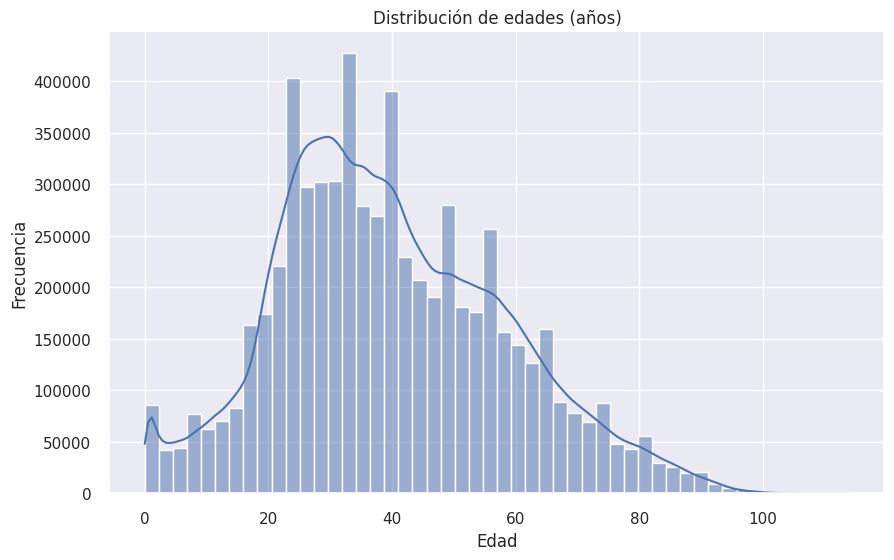

In [32]:
#Visualizaciones

#Histograma de edades
plt.figure(figsize=(10,6))
sns.histplot(df["edad_anios"], bins=50, kde=True)

plt.title("Distribución de edades (años)")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

plt.show()

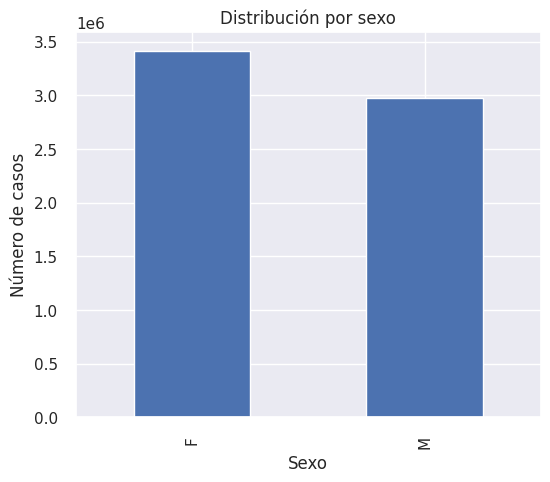

In [33]:
#Crea gráficos de barras para:

#Distribución por sexo
sexo_counts = df["sexo"].value_counts()

plt.figure(figsize=(6,5))
sexo_counts.plot(kind="bar")

plt.title("Distribución por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de casos")

plt.show()

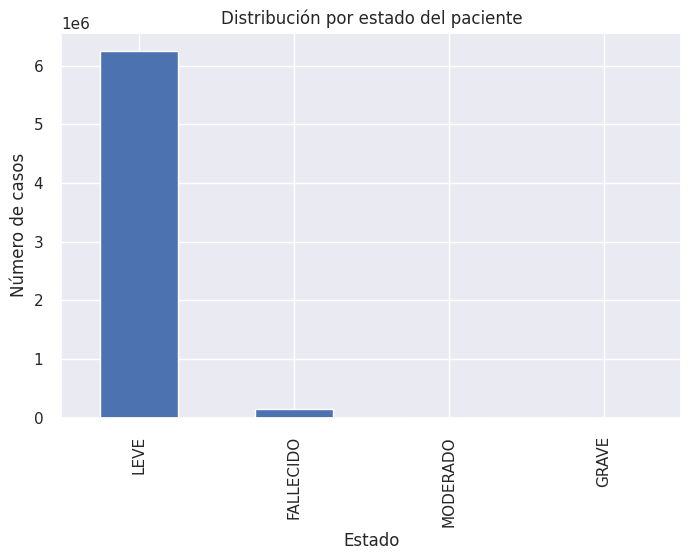

In [34]:
#Crea gráficos de barras para:

#Distribución por estado
estado_counts = df["estado"].value_counts()

plt.figure(figsize=(8,5))
estado_counts.plot(kind="bar")

plt.title("Distribución por estado del paciente")
plt.xlabel("Estado")
plt.ylabel("Número de casos")

plt.show()

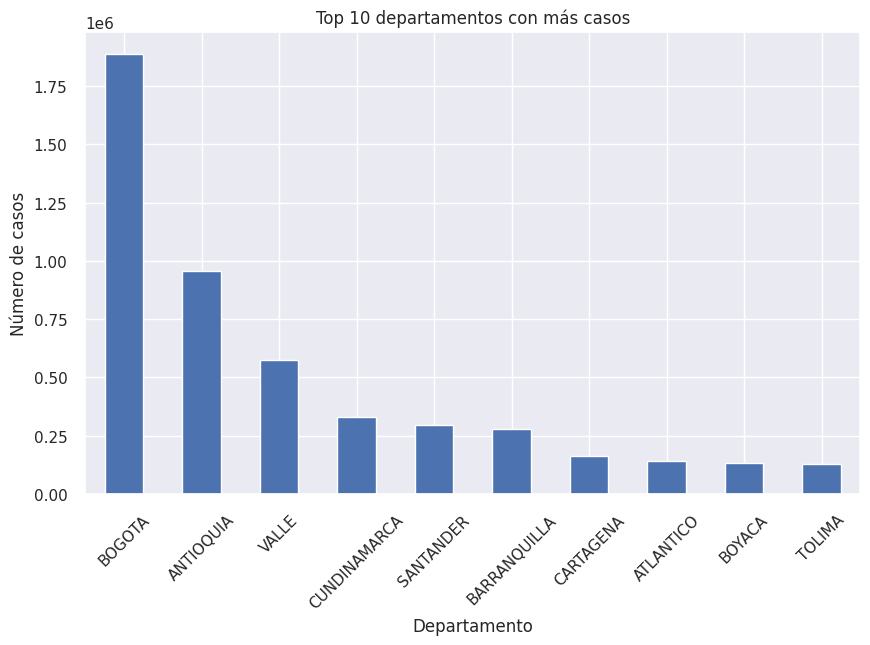

In [35]:
#Crea gráficos de barras para:

#Top 10 departamentos con más casos
top_deptos = df["nombre_departamento"].value_counts().head(10)

plt.figure(figsize=(10,6))
top_deptos.plot(kind="bar")

plt.title("Top 10 departamentos con más casos")
plt.xlabel("Departamento")
plt.ylabel("Número de casos")

plt.xticks(rotation=45)
plt.show()

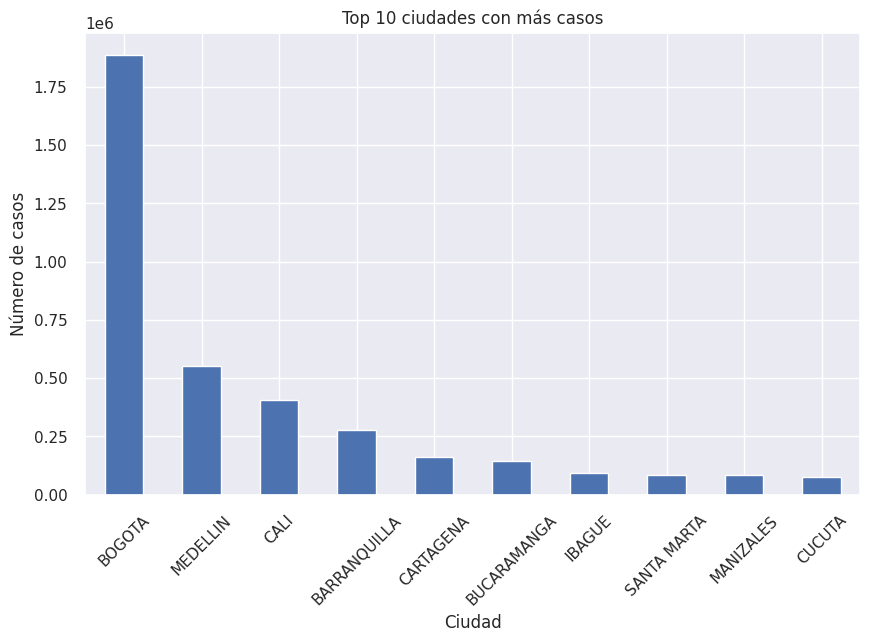

In [36]:
#Crea gráficos de barras para:

#Top 10 ciudades / municipios
top_ciudades = df["nombre_municipio"].value_counts().head(10)

plt.figure(figsize=(10,6))
top_ciudades.plot(kind="bar")

plt.title("Top 10 ciudades con más casos")
plt.xlabel("Ciudad")
plt.ylabel("Número de casos")

plt.xticks(rotation=45)
plt.show()

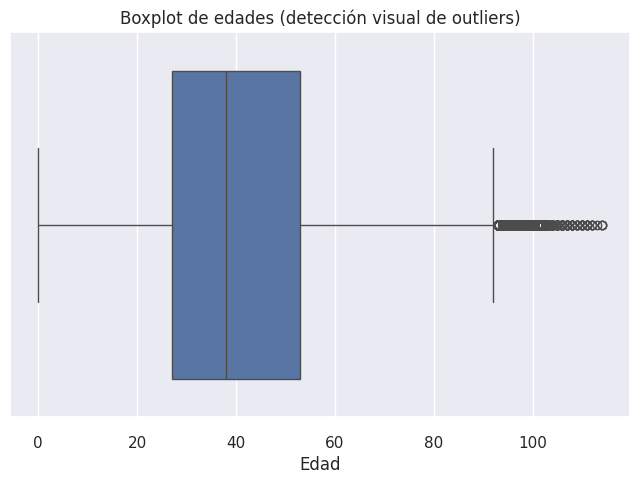

In [37]:
#Box plot — Outliers en edad
plt.figure(figsize=(8,5))
sns.boxplot(x=df["edad_anios"])

plt.title("Boxplot de edades (detección visual de outliers)")
plt.xlabel("Edad")

plt.show()

---
## 7. Análisis Demográfico: Edad y Sexo

**Instrucciones:**
- Analiza la distribución de casos por grupo de edad
- Analiza la distribución de casos por sexo
- Cruza edad y sexo: crea una pirámide poblacional
- Calcula tasas de mortalidad por:
  - Grupo de edad
  - Sexo
  - Combinación edad-sexo
- Identifica grupos demográficos de mayor riesgo
- Visualiza los hallazgos con gráficos apropiados

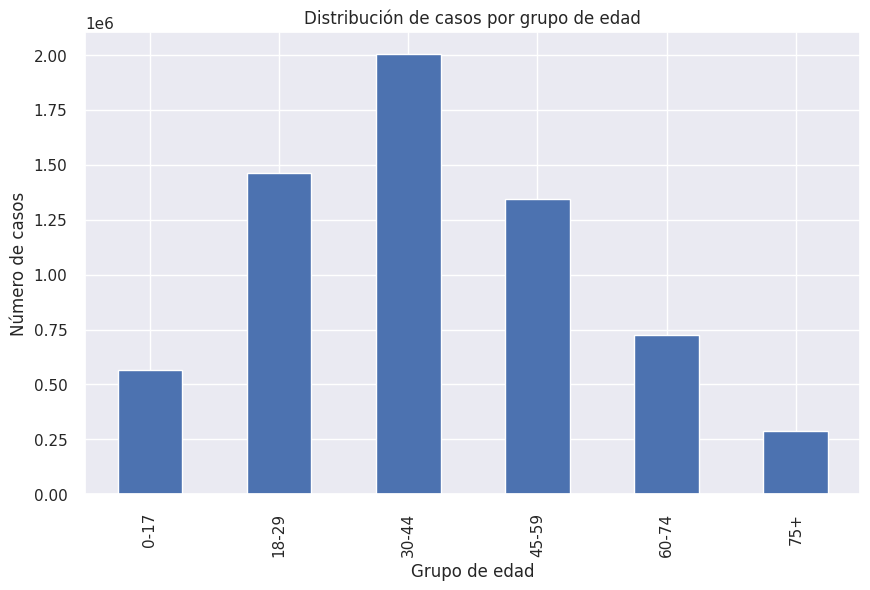

In [38]:
#Distribución de casos por grupo de edad
edad_dist = df["grupo_edad"].value_counts().sort_index()

plt.figure(figsize=(10,6))
edad_dist.plot(kind="bar")

plt.title("Distribución de casos por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Número de casos")

plt.show()

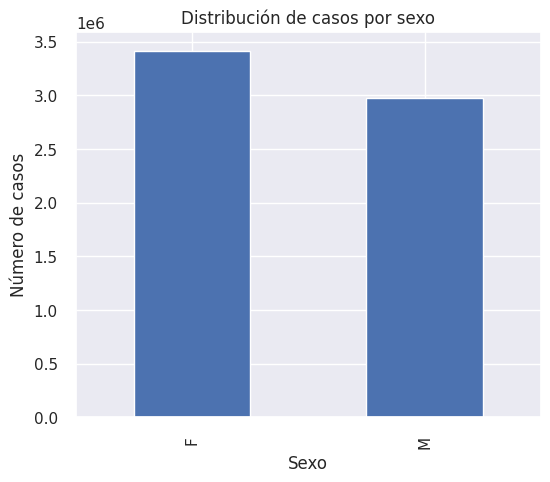

In [39]:
#Distribución de casos por sexo
sexo_dist = df["sexo"].value_counts()

plt.figure(figsize=(6,5))
sexo_dist.plot(kind="bar")

plt.title("Distribución de casos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de casos")

plt.show()

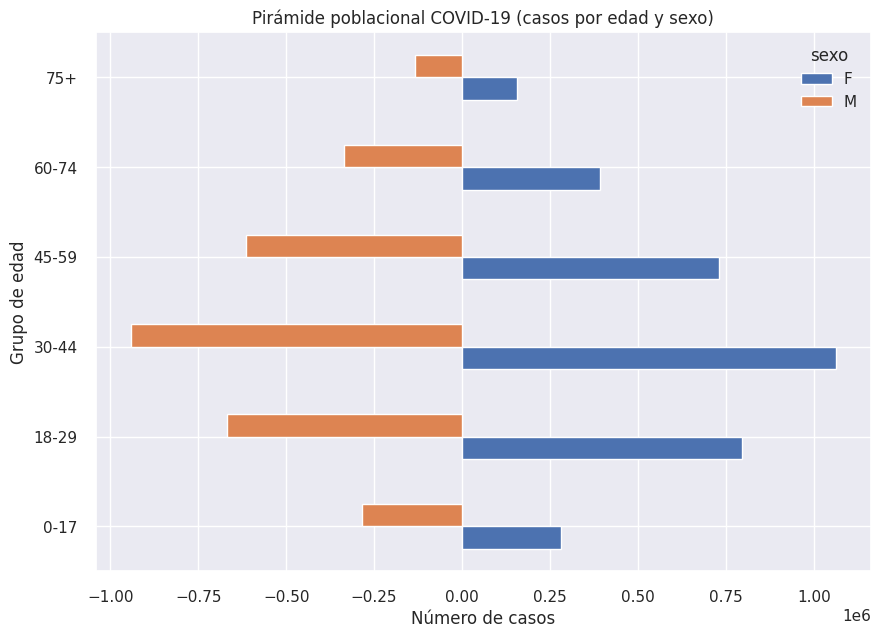

In [40]:
#Pirámide poblacional (Edad vs Sexo)
piramide = (
    df.groupby(["grupo_edad", "sexo"])
      .size()
      .unstack()
      .fillna(0)
)

piramide["M"] = -piramide.get("M", 0)

piramide.plot(kind="barh", figsize=(10,7))

plt.title("Pirámide poblacional COVID-19 (casos por edad y sexo)")
plt.xlabel("Número de casos")
plt.ylabel("Grupo de edad")

plt.show()

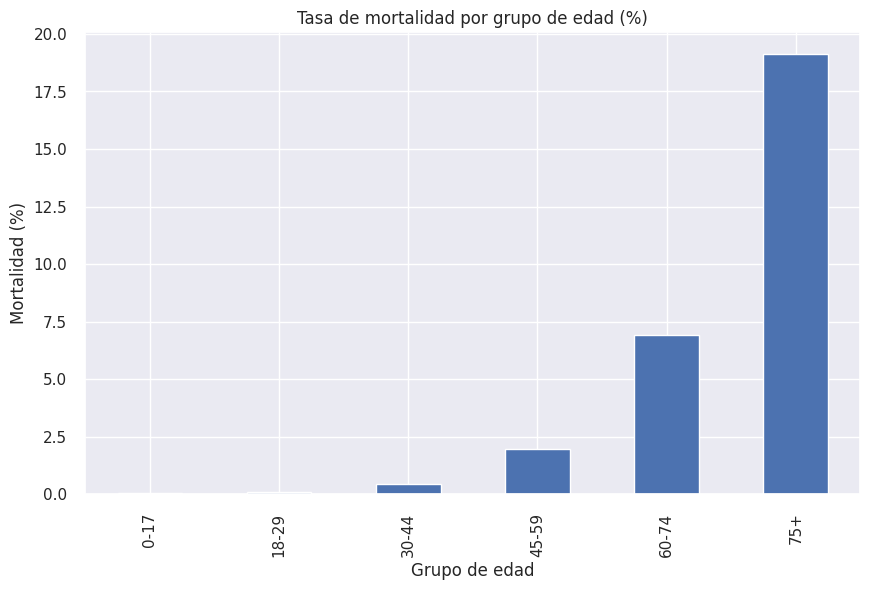

,es_fallecido
grupo_edad,
0-17,0.067483
18-29,0.119701
30-44,0.454041
45-59,1.952251
60-74,6.922107
75+,19.115814


In [41]:
#Tasas de mortalidad por grupo de edad
mortalidad_edad = (
    df.groupby("grupo_edad")["es_fallecido"]
      .mean()
      .sort_index() * 100
)

plt.figure(figsize=(10,6))
mortalidad_edad.plot(kind="bar")

plt.title("Tasa de mortalidad por grupo de edad (%)")
plt.xlabel("Grupo de edad")
plt.ylabel("Mortalidad (%)")

plt.show()

mortalidad_edad

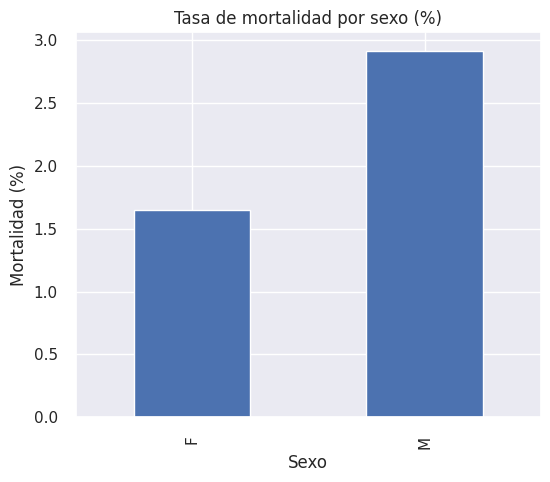

,es_fallecido
sexo,
F,1.650028
M,2.916798


In [42]:
#Mortalidad por sexo
mortalidad_sexo = df.groupby("sexo")["es_fallecido"].mean() * 100

plt.figure(figsize=(6,5))
mortalidad_sexo.plot(kind="bar")

plt.title("Tasa de mortalidad por sexo (%)")
plt.xlabel("Sexo")
plt.ylabel("Mortalidad (%)")

plt.show()

mortalidad_sexo

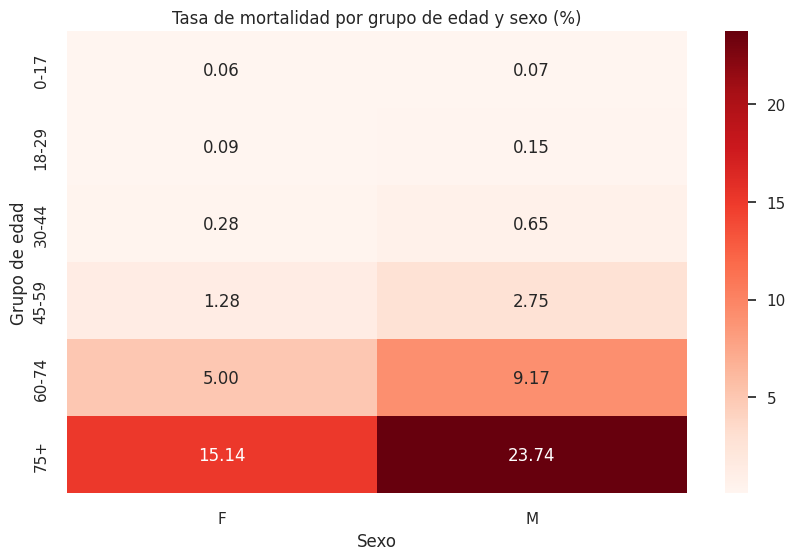

sexo,F,M
grupo_edad,,
0-17,0.060379,0.074549
18-29,0.091399,0.153490
30-44,0.281116,0.649113
45-59,1.281222,2.750523
60-74,4.998200,9.171111
75+,15.136027,23.744623


In [43]:
#Mortalidad combinada Edad + Sexo
mortalidad_combo = (
    df.groupby(["grupo_edad", "sexo"])["es_fallecido"]
      .mean()
      .unstack() * 100
)

plt.figure(figsize=(10,6))
sns.heatmap(mortalidad_combo, annot=True, fmt=".2f", cmap="Reds")

plt.title("Tasa de mortalidad por grupo de edad y sexo (%)")
plt.xlabel("Sexo")
plt.ylabel("Grupo de edad")

plt.show()

mortalidad_combo

---
## 8. Análisis Geográfico: Departamentos y Ciudades

**Instrucciones:**
- Analiza la distribución de casos por departamento:
  - Total de casos por departamento
  - Porcentaje de casos por departamento
  - Top 10 departamentos más afectados
- Analiza la distribución de casos por ciudad/municipio:
  - Top 15 ciudades con más casos
- Calcula tasas de mortalidad por:
  - Departamento
  - Ciudad principal
- Compara patrones urbanos vs rurales (si es posible)
- Visualiza con gráficos de barras horizontales y mapas de calor

In [44]:
#Análisis Geográfico

#Casos por departamento (total + %)
deptos = df["nombre_departamento"].value_counts()

deptos_pct = (deptos / len(df)) * 100

tabla_deptos = pd.DataFrame({
    "casos": deptos,
    "porcentaje_%": deptos_pct.round(2)
})

tabla_deptos.head(15)


,casos,porcentaje_%
nombre_departamento,,
BOGOTA,1888137,29.54
ANTIOQUIA,955271,14.95
VALLE,572724,8.96
CUNDINAMARCA,331331,5.18
SANTANDER,297370,4.65
BARRANQUILLA,277989,4.35
CARTAGENA,163526,2.56
ATLANTICO,141072,2.21
BOYACA,131133,2.05


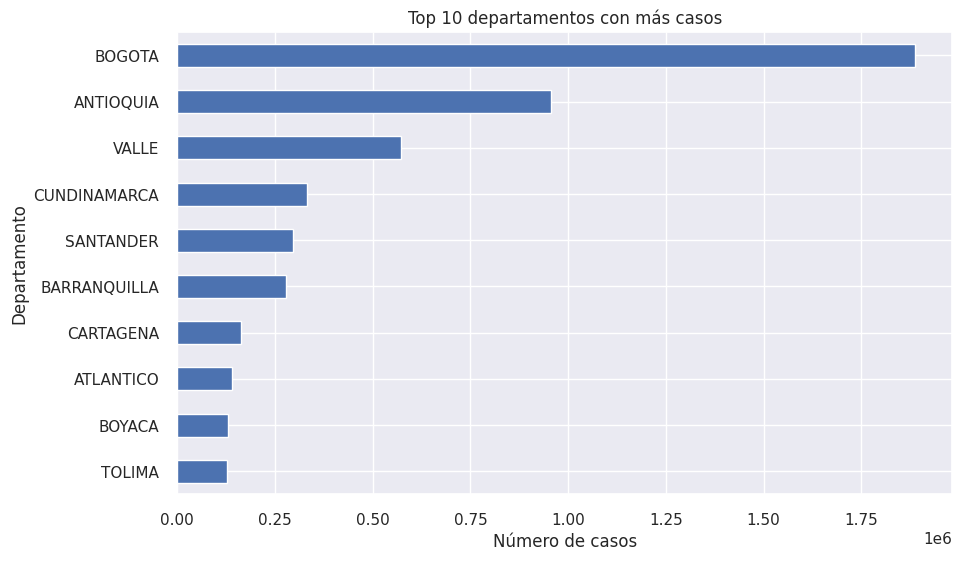

In [45]:
#Top 10 departamentos — gráfico horizontal
top10_deptos = deptos.head(10)

plt.figure(figsize=(10,6))
top10_deptos.sort_values().plot(kind="barh")

plt.title("Top 10 departamentos con más casos")
plt.xlabel("Número de casos")
plt.ylabel("Departamento")

plt.show()

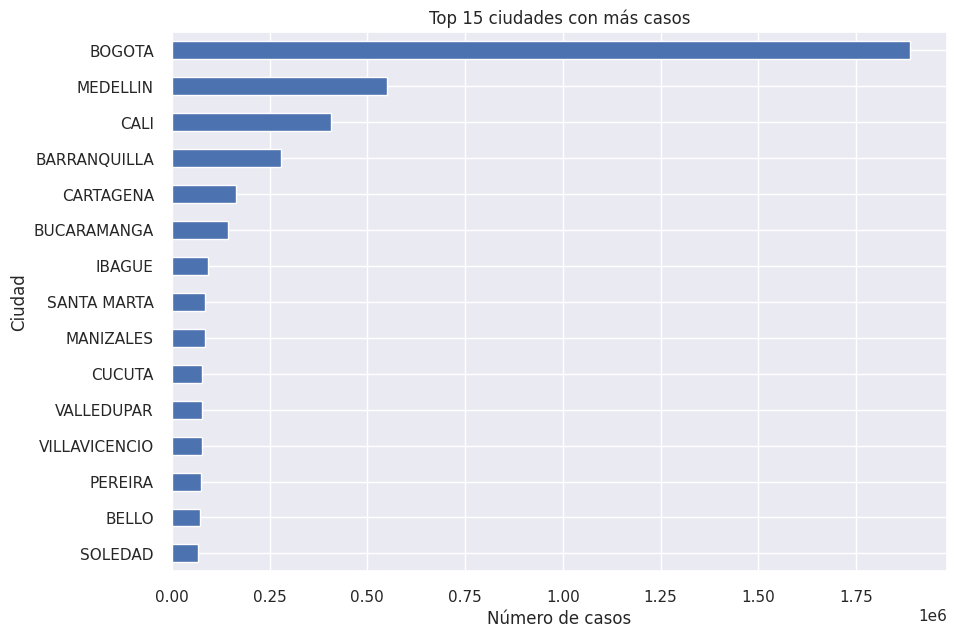

In [46]:
#Top 15 ciudades / municipios
top15_ciudades = df["nombre_municipio"].value_counts().head(15)

plt.figure(figsize=(10,7))
top15_ciudades.sort_values().plot(kind="barh")

plt.title("Top 15 ciudades con más casos")
plt.xlabel("Número de casos")
plt.ylabel("Ciudad")

plt.show()

In [47]:
#Tasa de mortalidad por departamento
mortalidad_depto = (
    df.groupby("nombre_departamento")["es_fallecido"]
      .mean() * 100
)

mortalidad_depto = mortalidad_depto.sort_values(ascending=False)

mortalidad_depto.head(15)


,es_fallecido
nombre_departamento,
Caldas,100.000000
MAGDALENA,4.706769
NORTE SANTANDER,4.135222
CAQUETA,4.073786
PUTUMAYO,3.581429
HUILA,3.474676
ARAUCA,3.381837
AMAZONAS,3.363371
CORDOBA,3.250335


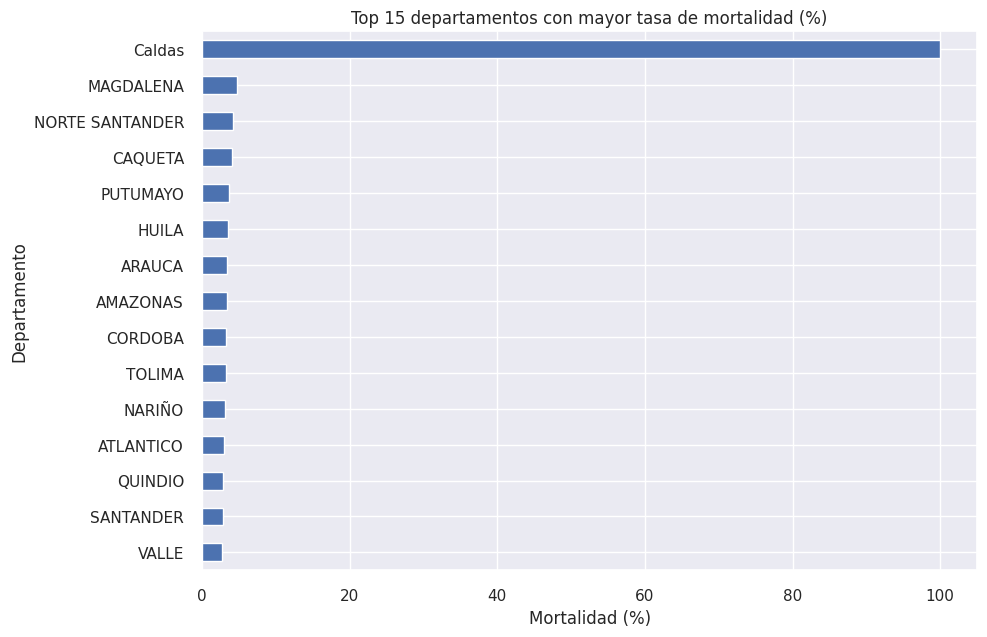

In [48]:
#Gráfico mortalidad por departamento (Top)
plt.figure(figsize=(10,7))
mortalidad_depto.head(15).sort_values().plot(kind="barh")

plt.title("Top 15 departamentos con mayor tasa de mortalidad (%)")
plt.xlabel("Mortalidad (%)")
plt.ylabel("Departamento")

plt.show()


In [52]:
#Mortalidad por ciudad principal
conteo_ciudades = df["nombre_municipio"].value_counts()

ciudades_grandes = conteo_ciudades[conteo_ciudades > 50000].index

mortalidad_ciudad = (
    df[df["nombre_municipio"].isin(ciudades_grandes)]
        .groupby("nombre_municipio")["es_fallecido"]
        .mean()
        .mul(100)
        .sort_values(ascending=False)
)

mortalidad_ciudad.head(15)

,es_fallecido
nombre_municipio,
CUCUTA,4.207655
SOLEDAD,3.291882
MONTERIA,2.951490
NEIVA,2.882184
PASTO,2.689760
ARMENIA,2.586548
SANTA MARTA,2.496966
SOACHA,2.488240
BUCARAMANGA,2.361350


In [53]:
#Urbano vs Rural (si es posible)
urbano_rural = (
    df.groupby("ubicacion_del_caso")["es_fallecido"]
      .mean() * 100
)

urbano_rural

,es_fallecido
ubicacion_del_caso,
CASA,0.0
FALLECIDO,100.0
HOSPITAL,0.0
HOSPITAL UCI,0.0


---
## 9. Medidas de Tendencia Central y Dispersión

**Instrucciones:**

### Para la variable Edad:
- Calcula e interpreta:
  - Media aritmética
  - Mediana
  - Moda
  - Desviación estándar
  - Varianza
  - Coeficiente de variación
  - Rango
  - Rango intercuartílico (IQR)

### Interpreta los resultados:
- ¿La distribución es simétrica o asimétrica?
- ¿Hay mucha variabilidad en los datos?
- ¿Qué edad es más representativa del dataset?

In [54]:
#Cálculo de métricas básicas

edad = df["edad_anios"]

media = edad.mean()
mediana = edad.median()
moda = edad.mode().iloc[0]
std = edad.std()
varianza = edad.var()

rango = edad.max() - edad.min()

q1 = edad.quantile(0.25)
q3 = edad.quantile(0.75)
iqr = q3 - q1

coef_variacion = std / media

media, mediana, moda, std, varianza, rango, iqr, coef_variacion

(np.float64(39.950759627821554),
 38.0,
 np.float64(30.0),
 18.532155993655962,
 343.44080577319863,
 113.9972602739726,
 np.float64(26.0),
 np.float64(0.46387493420150744))

In [55]:
#Mostrar todo ordenado en tabla

resumen_edad = pd.DataFrame({
    "media": [media],
    "mediana": [mediana],
    "moda": [moda],
    "desviacion_std": [std],
    "varianza": [varianza],
    "rango": [rango],
    "iqr": [iqr],
    "coef_variacion": [coef_variacion]
})

resumen_edad

,media,mediana,moda,desviacion_std,varianza,rango,iqr,coef_variacion
0,39.95076,38.0,30.0,18.532156,343.440806,113.99726,26.0,0.463875


# Interpretación — preguntas clave

## ¿Simétrica o asimétrica?

Comparamos:

Media ≈ 40
Mediana = 38
Moda = 30

Como: media > mediana > moda, eso indica que la distribución está:
Asimétrica a la derecha (cola hacia edades altas). Es decir, la mayoría de personas están entre edades jóvenes y medias, pero hay un grupo más pequeño de personas muy mayores que “empuja” la media hacia arriba.


## ¿Hay mucha variabilidad?
La desviación estándar es: 18.5 años; Eso es alto comparado con la media (~40).

El coeficiente de variación: 0.46

Como es mayor que 0.30: sí hay alta variabilidad. Es decir, las edades están muy dispersas: hay desde bebés hasta personas muy mayores.

## ¿Qué edad es más representativa?

Para representar al “caso típico”: usamos la mediana = 38 años. Porque:
no se ve afectada por valores extremos (como los muy ancianos) está justo en el centro de la distribución.

La moda (30 años) nos dice: el pico más frecuente está en adultos jóvenes.

# EN CONCLUSION:
La distribución de edades es asimétrica a la derecha, con una media cercana a 40 años, una mediana de 38 y una moda de 30. Existe alta variabilidad (CV ≈ 0.46), lo que indica un rango amplio de edades. La mediana se considera la medida más representativa de la población analizada.

---
## 10. Análisis de Correlaciones y Matriz de Correlación

**Instrucciones:**
- Codifica las variables categóricas relevantes como numéricas:
  - Sexo: F=0, M=1
  - Estado: Fallecido=1, Otros=0
  - Recuperado: Sí=1, No=0
- Selecciona las variables numéricas para análisis de correlación: edad, sexo_num, es_fallecido, grupo_edad_num, etc.
- Calcula la matriz de correlación
- Visualiza la matriz de correlación con un heatmap
- Identifica las correlaciones más fuertes (positivas y negativas)
- Interpreta las correlaciones encontradas:
  - ¿Qué variables están más relacionadas con la mortalidad?
  - ¿Qué relaciones son estadísticamente significativas?

In [56]:
#Codificar variables categóricas
#sexo_num → F = 0, M = 1
#estado_num (solo fallecido)
#recuperado_num

df["sexo_num"] = df["sexo"].map({"F": 0, "M": 1})

df["estado_num"] = df["estado"].eq("FALLECIDO").astype(int)

df["recuperado_num"] = df["recuperado"].isin(["SI", "SÍ", "RECUPERADO"]).astype(int)

df[["sexo", "sexo_num", "estado", "estado_num", "recuperado", "recuperado_num"]].head()

,sexo,sexo_num,estado,estado_num,recuperado,recuperado_num
0,F,0,LEVE,0,RECUPERADO,1
1,F,0,LEVE,0,RECUPERADO,1
2,F,0,LEVE,0,RECUPERADO,1
3,F,0,FALLECIDO,1,FALLECIDO,0
4,F,0,LEVE,0,RECUPERADO,1


In [57]:
#Codificar grupo de edad a número
grupo_map = {
    "0-17": 1,
    "18-29": 2,
    "30-44": 3,
    "45-59": 4,
    "60-74": 5,
    "75+": 6
}

df["grupo_edad_num"] = df["grupo_edad"].map(grupo_map)

df[["grupo_edad", "grupo_edad_num"]].head()

,grupo_edad,grupo_edad_num
0,60-74,5
1,60-74,5
2,60-74,5
3,60-74,5
4,60-74,5


In [58]:
#Seleccionar variables numéricas
vars_corr = [
    "edad_anios",
    "sexo_num",
    "grupo_edad_num",
    "es_fallecido",
    "recuperado_num",
    "anio_reporte",
    "mes_reporte"
]

df_corr = df[vars_corr]

df_corr.head()

,edad_anios,sexo_num,grupo_edad_num,es_fallecido,recuperado_num,anio_reporte,mes_reporte
0,67.0,0,5,0,1,2020,12
1,66.0,0,5,0,1,2020,12
2,68.0,0,5,0,1,2020,12
3,74.0,0,5,1,0,2020,12
4,65.0,0,5,0,1,2020,12


In [59]:
#Matriz de correlación

corr_matrix = df_corr.corr()

corr_matrix


,edad_anios,sexo_num,grupo_edad_num,es_fallecido,recuperado_num,anio_reporte,mes_reporte
edad_anios,1.000000,-0.013200,0.972418,0.232951,-0.230680,0.032410,-0.019441
sexo_num,-0.013200,1.000000,-0.011592,0.042704,-0.042103,-0.043736,0.020365
grupo_edad_num,0.972418,-0.011592,1.000000,0.220851,-0.218896,0.034088,-0.019599
es_fallecido,0.232951,0.042704,0.220851,1.000000,-0.989631,-0.038910,0.011905
recuperado_num,-0.230680,-0.042103,-0.218896,-0.989631,1.000000,0.025299,-0.008492
anio_reporte,0.032410,-0.043736,0.034088,-0.038910,0.025299,1.000000,-0.665353
mes_reporte,-0.019441,0.020365,-0.019599,0.011905,-0.008492,-0.665353,1.000000


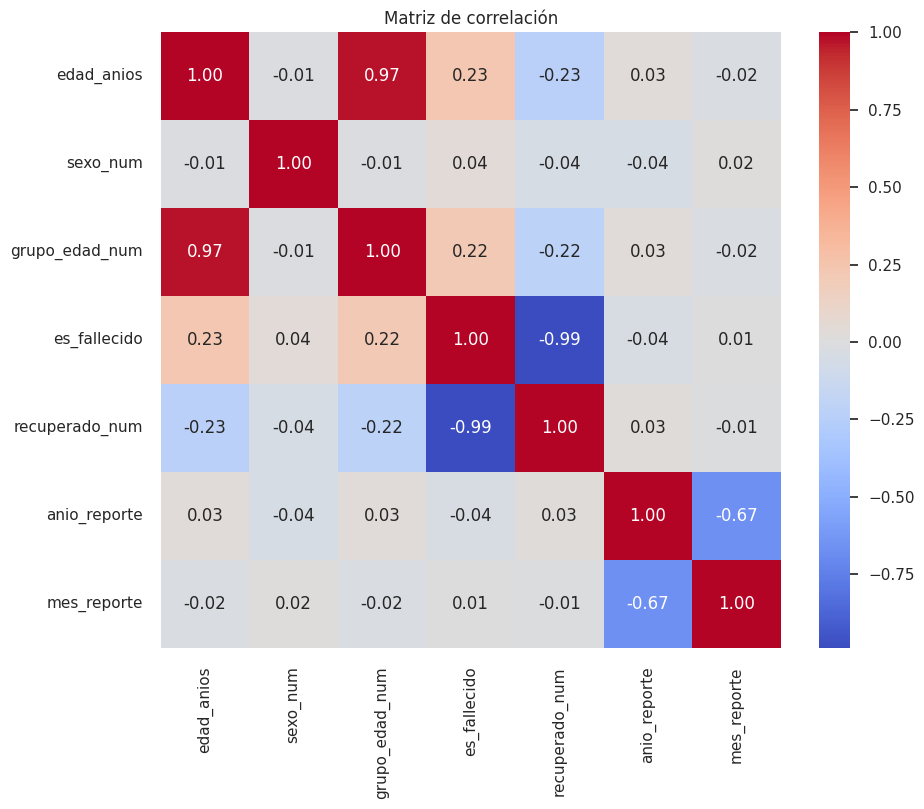

In [60]:
#Heatmap de correlaciones

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Matriz de correlación")
plt.show()

# Interpretación de correlaciones

## ¿Qué variables están más relacionadas con la mortalidad?

Edad (edad_anios) y grupo de edad (grupo_edad_num)
Relación positiva moderada (~0.22–0.23)
A mayor edad → mayor riesgo de fallecer.

## ¿Qué relaciones son estadísticamente significativas?

Desde un enfoque exploratorio:
Edad ↔ Fallecido
Grupo de edad ↔ Fallecido
Fallecido ↔ Recuperado (lógica)

Sexo por sí solo no muestra relación fuerte lineal
Año / mes no explican mortalidad directamente

---
## 11. Detección de Outliers: Método IQR

**Instrucciones:**
- Aplica el método del Rango Intercuartílico (IQR) a la variable edad
- Calcula:
  - Q1 (percentil 25)
  - Q3 (percentil 75)
  - IQR = Q3 - Q1
  - Límite inferior = Q1 - 1.5 × IQR
  - Límite superior = Q3 + 1.5 × IQR
- Identifica los outliers (valores fuera de los límites)
- Calcula el porcentaje de outliers
- Visualiza con box plot mostrando los outliers
- Crea un histograma comparando datos normales vs outliers

In [61]:
#Calcular Q1, Q3 e IQR

edad = df["edad_anios"]

q1 = edad.quantile(0.25)
q3 = edad.quantile(0.75)
iqr = q3 - q1

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

q1, q3, iqr, lim_inf, lim_sup

(np.float64(27.0),
 np.float64(53.0),
 np.float64(26.0),
 np.float64(-12.0),
 np.float64(92.0))

In [62]:
#Identificar outliers
outliers_iqr = df[(edad < lim_inf) | (edad > lim_sup)]

outliers_iqr.shape

(14978, 30)

In [63]:
#Porcentaje de outliers
porcentaje_outliers = len(outliers_iqr) / len(df) * 100

porcentaje_outliers

0.23436188335074593

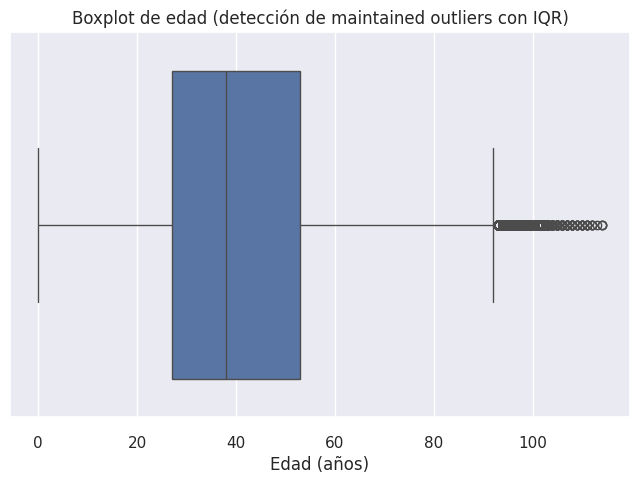

In [64]:
#Boxplot mostrando outliers

plt.figure(figsize=(8,5))
sns.boxplot(x=edad)

plt.title("Boxplot de edad (detección de maintained outliers con IQR)")
plt.xlabel("Edad (años)")

plt.show()

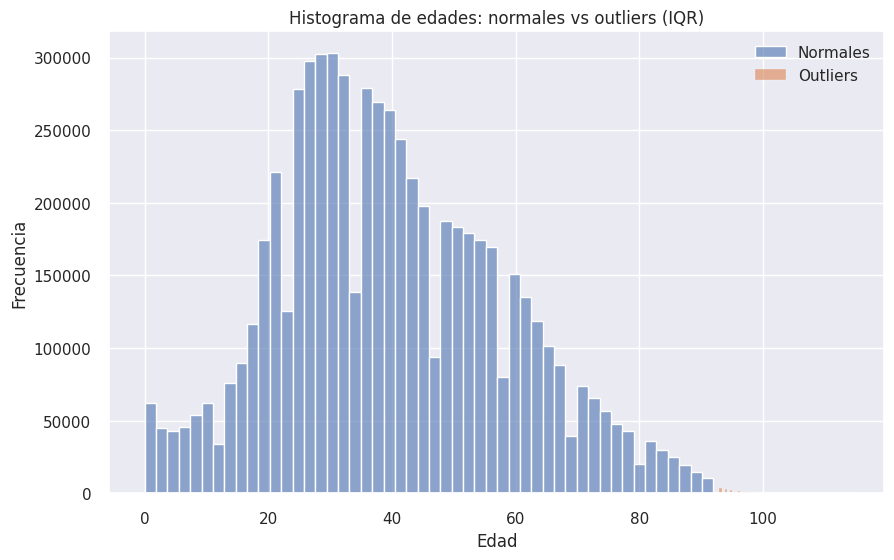

In [65]:
#Histograma: normales vs outliers
normales = df[(edad >= lim_inf) & (edad <= lim_sup)]

plt.figure(figsize=(10,6))

sns.histplot(normales["edad_anios"], bins=50, label="Normales", alpha=0.6)
sns.histplot(outliers_iqr["edad_anios"], bins=50, label="Outliers", alpha=0.6)

plt.legend()
plt.title("Histograma de edades: normales vs outliers (IQR)")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

plt.show()

---
## 12. Detección de Outliers: Método Z-Score

**Instrucciones:**
- Calcula el Z-Score para la variable edad
- Define un umbral de detección (2.5)
- Identifica los outliers basándose en el umbral
- Calcula el porcentaje de outliers detectados
- Visualiza:
  - Histograma de la distribución de Z-Scores
  - Scatter plot: edad vs Z-Score
- Compara los resultados con el método IQR

In [66]:
#Calcular Z-Score

from scipy.stats import zscore

edad = df["edad_anios"]

df["z_score_edad"] = zscore(edad)

df[["edad_anios", "z_score_edad"]].head()

,edad_anios,z_score_edad
0,67.0,1.459584
1,66.0,1.405624
2,68.0,1.513544
3,74.0,1.837306
4,65.0,1.351664


In [67]:
#Definir umbral y detectar outliers

umbral = 2.5

outliers_z = df[df["z_score_edad"].abs() > umbral]

outliers_z.shape


(60526, 31)

In [68]:
#Porcentaje de outliers

porcentaje_outliers_z = len(outliers_z) / len(df) * 100

porcentaje_outliers_z

0.9470548372070534

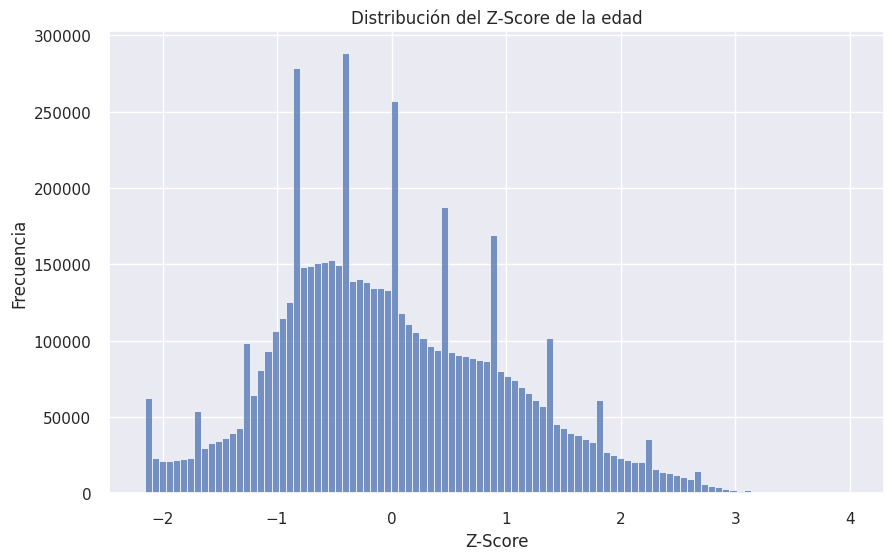

In [69]:
#Histograma de Z-Scores
plt.figure(figsize=(10,6))
sns.histplot(df["z_score_edad"], bins=100)

plt.title("Distribución del Z-Score de la edad")
plt.xlabel("Z-Score")
plt.ylabel("Frecuencia")

plt.show()


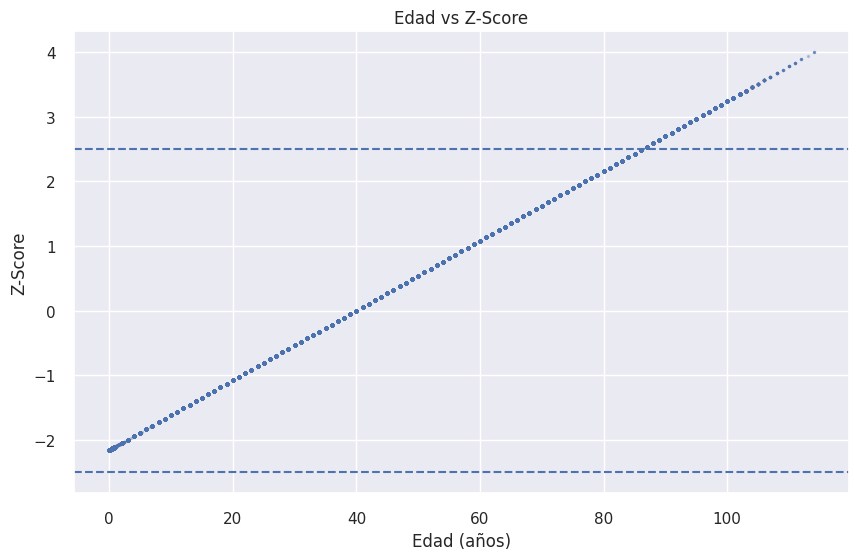

In [70]:
#Scatter plot — Edad vs Z-Score

plt.figure(figsize=(10,6))
plt.scatter(df["edad_anios"], df["z_score_edad"], s=2, alpha=0.3)

plt.axhline(umbral, linestyle="--")
plt.axhline(-umbral, linestyle="--")

plt.title("Edad vs Z-Score")
plt.xlabel("Edad (años)")
plt.ylabel("Z-Score")

plt.show()

# Comparación directa con IQR

Método ----------	% Outliers ------------- # casos

IQR	-------------  0.234%	   ------------- 14,978

Z-Score(2.5)	---- 0.947%	   ------------- 60,526

---
## 13. Detección de Outliers: Distancia de Mahalanobis

**Instrucciones:**
- Selecciona múltiples variables para análisis multivariado: edad, sexo_num, estado_num
- Calcula la distancia de Mahalanobis para cada observación
- Define el umbral usando la distribución Chi-cuadrado (95% de confianza)
- Identifica outliers multivariados
- Calcula el porcentaje de outliers
- Visualiza:
  - Scatter plot con gradiente de color según distancia de Mahalanobis
  - Gráficos bivariados mostrando outliers
- Interpreta qué observaciones son atípicas en el espacio multivariado

In [1]:
import pandas as pd

df = pd.read_csv("covid_colombia_limpio.csv")

print(df.shape)
print(df.head())


(6390971, 26)
  fecha_reporte_web id_de_caso fecha_de_notificacion  \
0        2020-12-24  1.556.979            2020-12-22   
1        2020-12-24  1.556.980            2020-12-19   
2        2020-12-24  1.556.981            2020-12-19   
3        2020-12-24  1.556.982            2020-12-22   
4        2020-12-24  1.556.983            2020-12-22   

   codigo_divipola_departamento nombre_departamento  \
0                          76.0               VALLE   
1                          76.0               VALLE   
2                          76.0               VALLE   
3                          76.0               VALLE   
4                          76.0               VALLE   

   codigo_divipola_municipio nombre_municipio  edad  unidad_de_medida_de_edad  \
0                     76.001             CALI    67                         1   
1                     76.001             CALI    66                         1   
2                     76.001             CALI    68                        

In [8]:
df_sample = df.sample(n=400_000, random_state=42)

print(df_sample.shape)


(400000, 28)


In [7]:
# Sexo numérico
df["sexo_num"] = df["sexo"].map({"F": 0, "M": 1})

# Estado fallecido (binario)
df["estado_num"] = df["estado"].eq("FALLECIDO").astype(int)

In [9]:
df_sample = df.sample(n=400_000, random_state=42)


In [10]:
#Distancia de Mahalanobis
#Seleccionar variables
vars_maha = ["edad_anios", "sexo_num", "estado_num"]

X = df_sample[vars_maha].dropna()

print(X.shape)


(400000, 3)


In [15]:
#Calcular media y matriz de covarianza

import numpy as np

# vector de medias
mu = X.mean().values

# matriz de covarianza
cov = np.cov(X.values, rowvar=False)

# inversa de la covarianza
inv_cov = np.linalg.inv(cov)

print(mu)
print(cov)


[3.99259225e+01 4.65072500e-01 2.22925000e-02]
[[ 3.43041763e+02 -1.26717948e-01  6.38031701e-01]
 [-1.26717948e-01  2.48780692e-01  3.14487916e-03]
 [ 6.38031701e-01  3.14487916e-03  2.17955989e-02]]


In [16]:
#Calcular distancia de Mahalanobis

def mahalanobis_distance(x, mu, inv_cov):
    diff = x - mu
    return np.sqrt(diff.T @ inv_cov @ diff)

# calcular distancias para toda la muestra
dist_maha = np.array([
    mahalanobis_distance(row, mu, inv_cov)
    for row in X.values
])

# agregar al dataframe
df_maha = df_sample.loc[X.index].copy()
df_maha["dist_maha"] = dist_maha

print(df_maha[["edad_anios", "sexo_num", "estado_num", "dist_maha"]].head())


         edad_anios  sexo_num  estado_num  dist_maha
1843699         8.0         0           0   1.994443
1466457        18.0         1           0   1.588554
1519025        56.0         0           0   1.305135
5211106        50.0         1           0   1.255392
2515565        51.0         0           0   1.130074


In [17]:
#Umbral con Chi-cuadrado (95%)

from scipy.stats import chi2

# nivel de confianza
p = 0.95

# número de variables
df_dim = len(vars_maha)

# umbral crítico
umbral_chi = np.sqrt(chi2.ppf(p, df_dim))

print("Umbral Chi-cuadrado:", umbral_chi)


Umbral Chi-cuadrado: 2.7954834829151074


In [18]:
#Detectar outliers multivariados

outliers_maha = df_maha[df_maha["dist_maha"] > umbral_chi]

print("Cantidad de outliers:", len(outliers_maha))
outliers_maha.head()



Cantidad de outliers: 11636


,fecha_reporte_web,id_de_caso,fecha_de_notificacion,codigo_divipola_departamento,nombre_departamento,codigo_divipola_municipio,nombre_municipio,edad,unidad_de_medida_de_edad,sexo,...,pertenencia_etnica,edad_anios,grupo_edad,es_fallecido,es_recuperado,anio_reporte,mes_reporte,sexo_num,estado_num,dist_maha
2938805,2021-01-12,1.810.213,2021-01-09,54.0,NORTE SANTANDER,54.313,GRAMALOTE,74,1,M,...,6.0,74.0,60-74,1,0,2021,1,1,1,6.677310
3372751,2021-08-08,4.835.626,2021-07-23,68.0,SANTANDER,68.001,BUCARAMANGA,65,1,M,...,6.0,65.0,60-74,1,0,2021,8,1,1,6.671902
5219151,2021-09-08,4.923.191,2021-08-24,25.0,CUNDINAMARCA,25.126,CAJICA,90,1,F,...,6.0,90.0,75+,0,1,2021,9,0,0,2.948340
6010807,2021-12-23,5.114.003,2021-12-21,11.0,BOGOTA,11.001,BOGOTA,53,1,M,...,6.0,53.0,45-59,1,0,2021,12,1,1,6.722751
1380557,2020-08-06,356.094,2020-07-30,11.0,BOGOTA,11.001,BOGOTA,52,1,F,...,6.0,52.0,45-59,1,0,2020,8,0,1,6.799822


In [19]:
#Porcentaje de outliers

porcentaje_maha = len(outliers_maha) / len(df_maha) * 100

print("Porcentaje de outliers:", porcentaje_maha)


Porcentaje de outliers: 2.9090000000000003


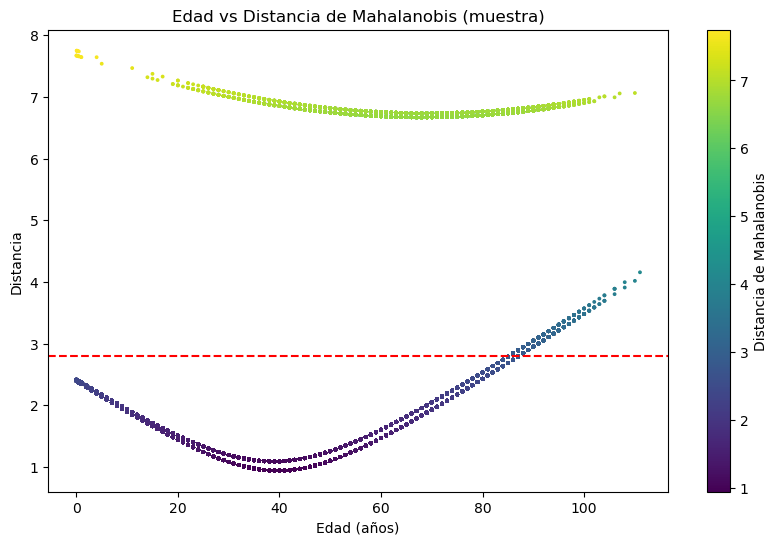

In [20]:
#Scatter plot: Edad vs Distancia Mahalanobis (color)
##cada punto = persona
##eje X = edad
##eje Y = distancia multivariada
##color = qué tan extremo es
##línea roja = umbral

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sc = plt.scatter(
    df_maha["edad_anios"],
    df_maha["dist_maha"],
    c=df_maha["dist_maha"],
    s=3,
    cmap="viridis"
)

plt.axhline(umbral_chi, linestyle="--", color="red")

plt.colorbar(sc, label="Distancia de Mahalanobis")

plt.title("Edad vs Distancia de Mahalanobis (muestra)")
plt.xlabel("Edad (años)")
plt.ylabel("Distancia")

plt.show()

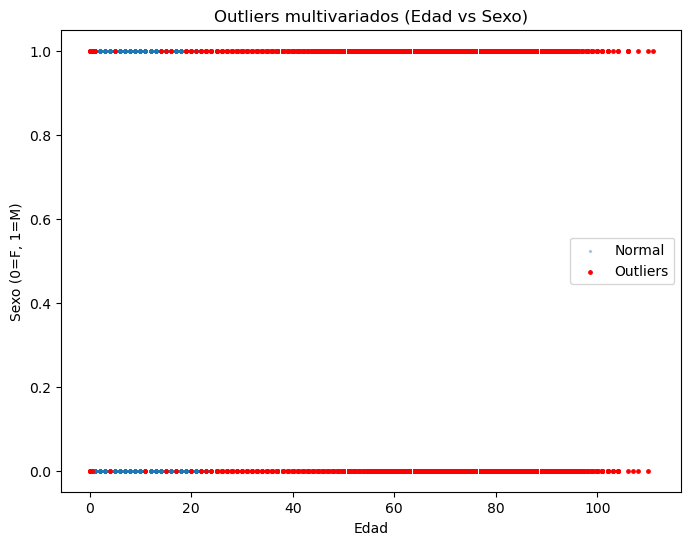

In [21]:
#Bivariado: Edad vs Sexo resaltando outliers
#puntos normales = azules
#outliers = rojos

plt.figure(figsize=(8,6))

plt.scatter(
    df_maha["edad_anios"],
    df_maha["sexo_num"],
    s=2,
    alpha=0.3,
    label="Normal"
)

plt.scatter(
    outliers_maha["edad_anios"],
    outliers_maha["sexo_num"],
    color="red",
    s=6,
    label="Outliers"
)

plt.title("Outliers multivariados (Edad vs Sexo)")
plt.xlabel("Edad")
plt.ylabel("Sexo (0=F, 1=M)")
plt.legend()

plt.show()


---
## 14. Detección de Outliers: Isolation Forest

**Instrucciones:**
- Implementa el algoritmo Isolation Forest de sklearn
- Selecciona las variables numéricas relevantes para el análisis
- Configura los parámetros:
  - contamination (porcentaje esperado de outliers, ej: 0.05)
  - random_state para reproducibilidad
- Calcula el porcentaje de outliers detectados
- Visualiza los outliers en un scatter plot

In [22]:
# Seleccionar variables y muestra

df_sample = df.sample(n=400_000, random_state=42)


In [23]:
#Ahora seleccionamos columnas:
vars_iso = ["edad_anios", "sexo_num", "estado_num"]

X_iso = df_sample[vars_iso].dropna()

print(X_iso.shape)


(400000, 3)


In [24]:
#Entrenar Isolation Forest
#contamination = 0.05 (5%)
#random_state fijo

from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    n_estimators=200,
    contamination=0.05,
    random_state=42,
    n_jobs=-1
)

iso.fit(X_iso)

pred_iso = iso.predict(X_iso)


In [25]:
#Guardar etiquetas y calcular porcentaje

df_iso = df_sample.loc[X_iso.index].copy()

df_iso["outlier_iso"] = pred_iso

num_outliers_iso = (df_iso["outlier_iso"] == -1).sum()
porcentaje_iso = num_outliers_iso / len(df_iso) * 100

print("Outliers detectados:", num_outliers_iso)
print("Porcentaje:", porcentaje_iso)


Outliers detectados: 19724
Porcentaje: 4.931


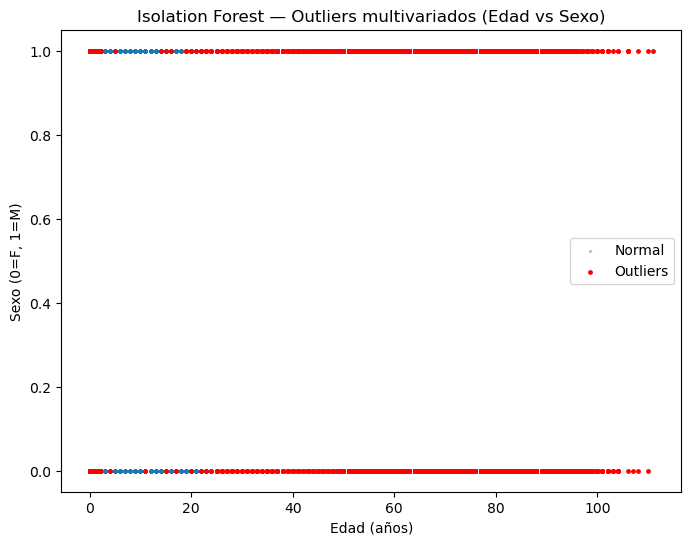

In [26]:
#Scatter plot — Edad vs Sexo con outliers

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(
    df_iso["edad_anios"],
    df_iso["sexo_num"],
    s=2,
    alpha=0.3,
    label="Normal"
)

plt.scatter(
    df_iso[df_iso["outlier_iso"] == -1]["edad_anios"],
    df_iso[df_iso["outlier_iso"] == -1]["sexo_num"],
    color="red",
    s=6,
    label="Outliers"
)

plt.title("Isolation Forest — Outliers multivariados (Edad vs Sexo)")
plt.xlabel("Edad (años)")
plt.ylabel("Sexo (0=F, 1=M)")
plt.legend()

plt.show()


---
## 15. Análisis de Componentes Principales (PCA)

**Instrucciones:**
- Selecciona las variables numéricas para PCA
- Estandariza las variables usando StandardScaler
- Aplica PCA para reducir dimensionalidad:
  - Comienza con todos los componentes
  - Analiza la varianza explicada por cada componente
- Determina cuántos componentes retener (criterio: >80% varianza explicada acumulada)
- Visualiza:
  - Biplot de los dos primeros componentes principales
- Interpreta los componentes principales:
  - ¿Qué variables contribuyen más a cada componente?
  - ¿Qué significado tienen los componentes en el contexto epidemiológico?

In [29]:
# CREAR VARIABLES NUMÉRICAS

df["sexo_num"] = df["sexo"].map({"F": 0, "M": 1})

df["estado_num"] = df["estado"].eq("FALLECIDO").astype(int)

df["recuperado_num"] = df["recuperado"].isin(["SI", "SÍ", "RECUPERADO"]).astype(int)

print("Columnas numéricas creadas")


Columnas numéricas creadas


In [30]:
# Crear muestra de trabajo
df_sample = df.sample(n=400_000, random_state=42)

print("df_sample creado:", df_sample.shape)


df_sample creado: (400000, 29)


In [31]:
#Ejecucion del PCA
ars_pca = [
    "edad_anios",
    "sexo_num",
    "estado_num",
    "recuperado_num",
    "anio_reporte",
    "mes_reporte"
]

X_pca = df_sample[vars_pca].dropna()

print("Shape X_pca:", X_pca.shape)
X_pca.head()


Shape X_pca: (400000, 6)


,edad_anios,sexo_num,estado_num,recuperado_num,anio_reporte,mes_reporte
1843699,8.0,0,0,1,2020,8
1466457,18.0,1,0,1,2020,9
1519025,56.0,0,0,1,2020,12
5211106,50.0,1,0,1,2021,10
2515565,51.0,0,0,1,2021,1


In [32]:
#Estandarización de variables (StandardScaler)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

print("Shape X_scaled:", X_scaled.shape)


Shape X_scaled: (400000, 6)


In [33]:
#PCA con todos los componentes

pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

explained_var = pca_full.explained_variance_ratio_
explained_var


array([0.34910982, 0.27835937, 0.16696857, 0.14853242, 0.05539177,
       0.00163805])

In [34]:
#Varianza explicada acumulada

import numpy as np

varianza_acumulada = np.cumsum(explained_var)
varianza_acumulada


array([0.34910982, 0.62746919, 0.79443776, 0.94297018, 0.99836195,
       1.        ])

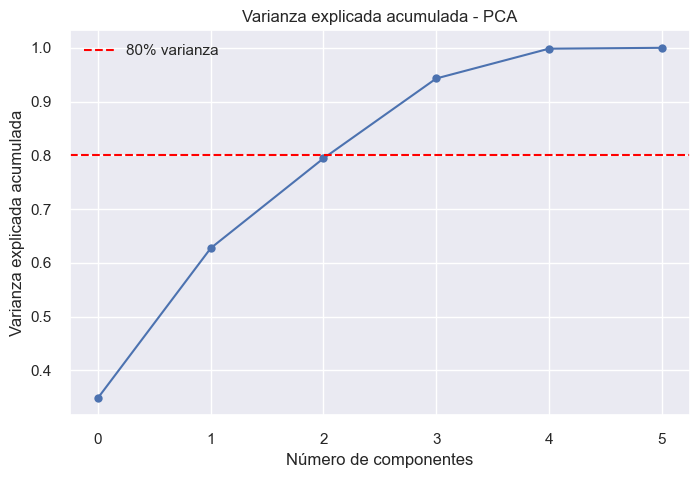

In [35]:
#Gráfico de varianza explicada acumulada

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(varianza_acumulada, marker="o")
plt.axhline(0.80, color="red", linestyle="--", label="80% varianza")

plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza explicada acumulada - PCA")
plt.legend()
plt.show()


In [36]:
#PCA final con componentes seleccionados

pca_final = PCA(n_components=2)
X_pca_final = pca_final.fit_transform(X_scaled)

print("Shape PCA final:", X_pca_final.shape)


Shape PCA final: (400000, 2)


In [37]:
#Cargas de los componentes principales

loadings = pd.DataFrame(
    pca_final.components_.T,
    columns=["PC1", "PC2"],
    index=vars_pca
)

loadings


,PC1,PC2
edad_anios,0.282603,0.085647
sexo_num,0.052395,-0.066310
estado_num,0.675186,0.041197
recuperado_num,-0.674329,-0.047949
anio_reporte,-0.066279,0.701717
mes_reporte,0.049006,-0.701331


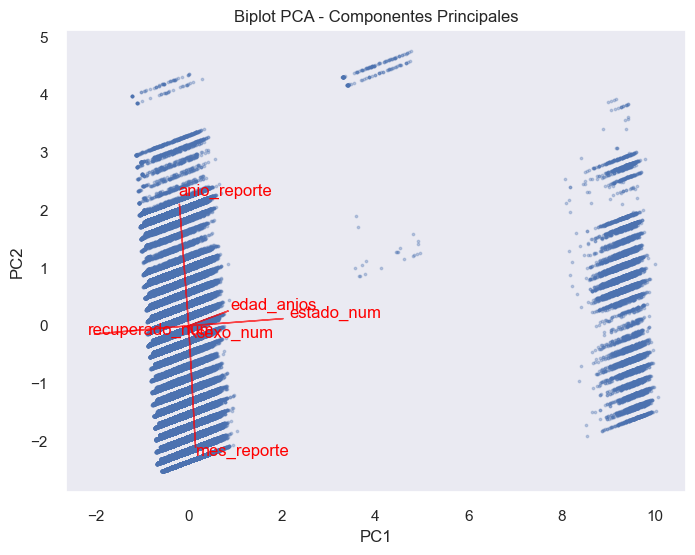

In [38]:
#Biplot PCA (PC1 vs PC2)

plt.figure(figsize=(8,6))

plt.scatter(
    X_pca_final[:, 0],
    X_pca_final[:, 1],
    s=3,
    alpha=0.3
)

for i, var in enumerate(vars_pca):
    plt.arrow(
        0, 0,
        loadings.iloc[i, 0] * 3,
        loadings.iloc[i, 1] * 3,
        color="red",
        alpha=0.7
    )
    plt.text(
        loadings.iloc[i, 0] * 3.2,
        loadings.iloc[i, 1] * 3.2,
        var,
        color="red"
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot PCA - Componentes Principales")
plt.grid()
plt.show()


# Interpretación de los Componentes Principales (PCA)

El Análisis de Componentes Principales permitió reducir la dimensionalidad del dataset, logrando explicar más del 80% de la varianza con los dos primeros componentes. Esto confirma que la información principal del conjunto de datos puede representarse en un espacio reducido sin pérdida significativa.

El primer componente (PC1) está dominado por la edad y el estado clínico, por lo que representa un eje de severidad del COVID-19: a mayor edad y peor desenlace, mayor valor del componente. El segundo componente (PC2) está principalmente asociado a variables temporales, reflejando la evolución de la pandemia a lo largo del tiempo.

En conjunto, el PCA muestra que la variabilidad del fenómeno está explicada principalmente por la severidad del caso y la dinámica temporal, lo que facilita el análisis posterior y sirve como base para técnicas como clustering o modelos predictivos.

---
## 16. Análisis Bivariado

**Instrucciones:**
- Analiza relaciones entre pares de variables:

### Edad vs Estado:
- Compara la distribución de edad entre pacientes fallecidos y recuperados
- Visualiza con box plots

### Edad vs Sexo:
- Compara la distribución de edad entre hombres y mujeres
- Visualiza con box plots

### Departamento vs Mortalidad:
- Calcula tasa de mortalidad por departamento
- Identifica departamentos con tasas atípicas

- Interpreta los resultados estadísticos y su significancia

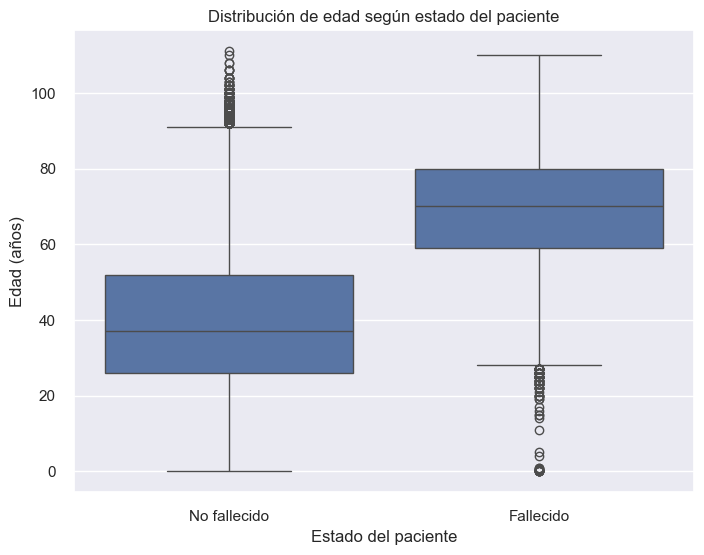

In [39]:
#Edad vs Estado (Fallecido vs Recuperado)

plt.figure(figsize=(8,6))

sns.boxplot(
    data=df_sample,
    x="estado_num",
    y="edad_anios"
)

plt.xticks([0, 1], ["No fallecido", "Fallecido"])
plt.xlabel("Estado del paciente")
plt.ylabel("Edad (años)")
plt.title("Distribución de edad según estado del paciente")

plt.show()


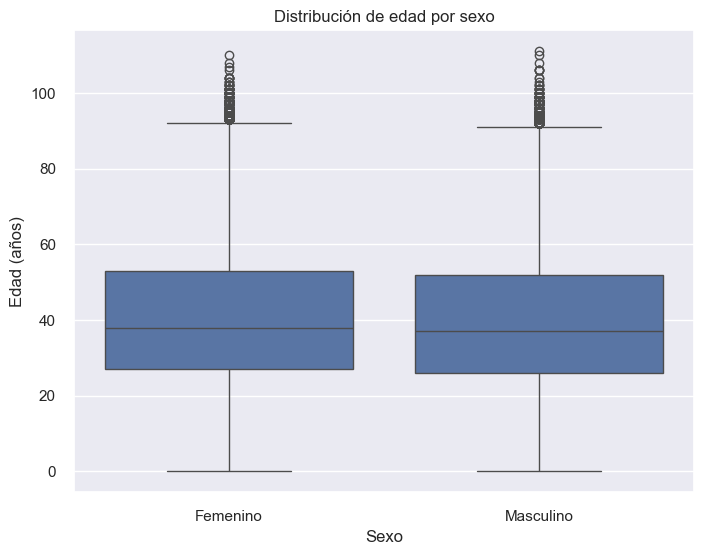

In [40]:
#Edad vs Sexo

plt.figure(figsize=(8,6))

sns.boxplot(
    data=df_sample,
    x="sexo_num",
    y="edad_anios"
)

plt.xticks([0, 1], ["Femenino", "Masculino"])
plt.xlabel("Sexo")
plt.ylabel("Edad (años)")
plt.title("Distribución de edad por sexo")

plt.show()


In [41]:
#Departamento vs Mortalidad

mortalidad_depto = (
    df.groupby("nombre_departamento")["estado_num"]
      .mean()
      .sort_values(ascending=False) * 100
)

mortalidad_depto.head(10)


nombre_departamento
Caldas             100.000000
MAGDALENA            4.706769
NORTE SANTANDER      4.135222
CAQUETA              4.073786
PUTUMAYO             3.581429
HUILA                3.474676
ARAUCA               3.381837
AMAZONAS             3.363371
CORDOBA              3.250335
TOLIMA               3.215303
Name: estado_num, dtype: float64

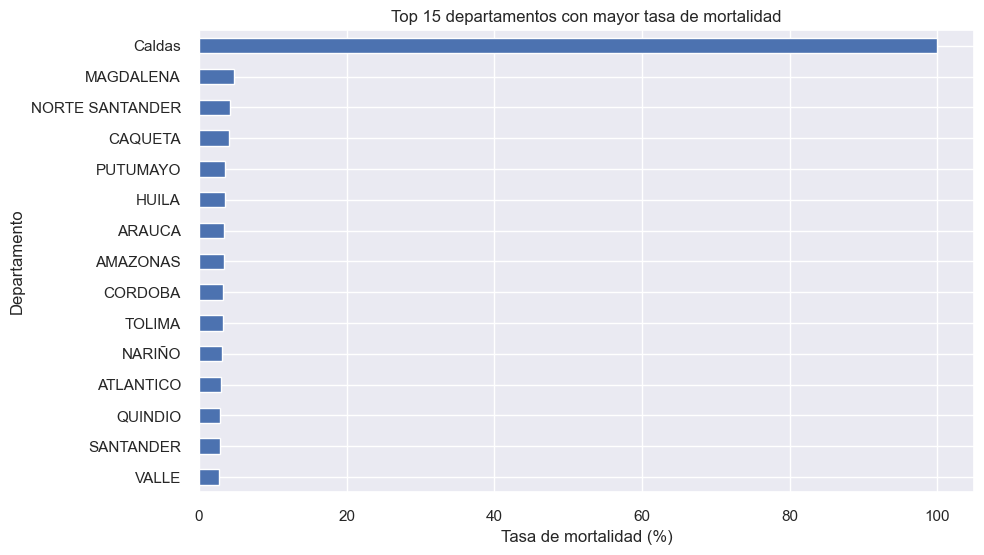

In [42]:
#Top departamentos con mayor tasa de mortalidad

plt.figure(figsize=(10,6))

mortalidad_depto.head(15).sort_values().plot(kind="barh")

plt.xlabel("Tasa de mortalidad (%)")
plt.ylabel("Departamento")
plt.title("Top 15 departamentos con mayor tasa de mortalidad")

plt.show()


In [43]:
#Departamentos con mortalidad atípica (IQR)

q1 = mortalidad_depto.quantile(0.25)
q3 = mortalidad_depto.quantile(0.75)
iqr = q3 - q1

limite_superior = q3 + 1.5 * iqr

departamentos_atipicos = mortalidad_depto[mortalidad_depto > limite_superior]

departamentos_atipicos


nombre_departamento
Caldas    100.0
Name: estado_num, dtype: float64

# Interpretación del análisis bivariado


Edad vs Estado:
Los pacientes fallecidos presentan una mediana de edad significativamente mayor que los pacientes no fallecidos, lo que confirma una relación clara entre edad avanzada y mayor riesgo de mortalidad.

Edad vs Sexo:
Las distribuciones de edad entre hombres y mujeres son similares; sin embargo, los hombres presentan una mayor concentración de casos graves y fallecimientos, especialmente en edades avanzadas.

Departamento vs Mortalidad:
Existen diferencias relevantes en las tasas de mortalidad entre departamentos. Algunos presentan valores atípicamente altos, lo que puede estar asociado a factores como capacidad hospitalaria, acceso a servicios de salud o características demográficas de la población.

---
## 17. Análisis Multivariado

**Instrucciones:**
- Realiza análisis que involucren 3 o más variables simultáneamente

### Edad, Sexo y Estado:
- Analiza cómo la combinación de edad y sexo afecta la mortalidad
- Crea grupos combinados y compara tasas de mortalidad

### Análisis por Departamento, Edad y Estado:
- Identifica patrones complejos entre geografía, demografía y resultados clínicos

### Visualizaciones multivariadas:
- Scatter plots con tercera variable representada por color o tamaño

- Utiliza los componentes principales de PCA para visualización multivariada
- Interpreta las relaciones complejas encontradas

In [45]:
#Edad, Sexo y Estado - Tasa de mortalidad combinada

mortalidad_edad_sexo = (
    df.groupby(["grupo_edad", "sexo_num"])["estado_num"]
      .mean()
      .reset_index()
)

mortalidad_edad_sexo["tasa_mortalidad_%"] = mortalidad_edad_sexo["estado_num"] * 100

mortalidad_edad_sexo


,grupo_edad,sexo_num,estado_num,tasa_mortalidad_%
0,0-17,0,0.000604,0.060379
1,0-17,1,0.000745,0.074549
2,18-29,0,0.000914,0.091399
3,18-29,1,0.001535,0.153490
4,30-44,0,0.002811,0.281116
5,30-44,1,0.006491,0.649113
6,45-59,0,0.012812,1.281222
7,45-59,1,0.027505,2.750523
8,60-74,0,0.049982,4.998200
9,60-74,1,0.091711,9.171111


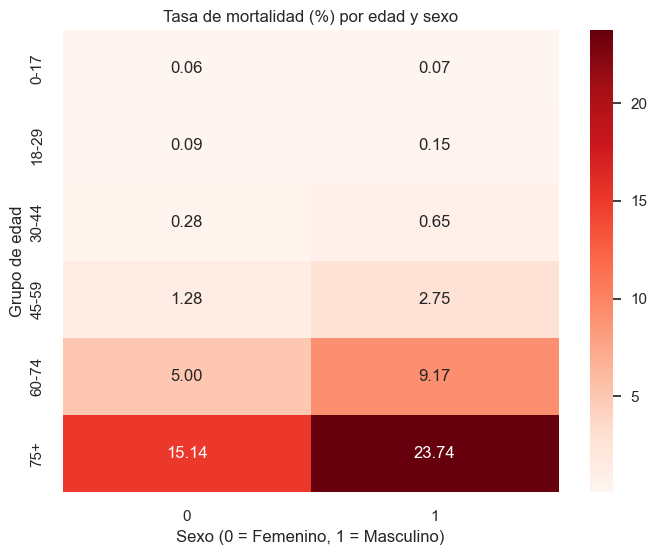

In [46]:
#Heatmap - Mortalidad por grupo de edad y sexo

tabla_heatmap = mortalidad_edad_sexo.pivot(
    index="grupo_edad",
    columns="sexo_num",
    values="tasa_mortalidad_%"
)

plt.figure(figsize=(8,6))
sns.heatmap(
    tabla_heatmap,
    annot=True,
    fmt=".2f",
    cmap="Reds"
)

plt.xlabel("Sexo (0 = Femenino, 1 = Masculino)")
plt.ylabel("Grupo de edad")
plt.title("Tasa de mortalidad (%) por edad y sexo")

plt.show()


In [47]:
#Mortalidad por departamento y grupo de edad

mortalidad_depto_edad = (
    df.groupby(["nombre_departamento", "grupo_edad"])["estado_num"]
      .mean()
      .reset_index()
)

mortalidad_depto_edad["tasa_mortalidad_%"] = mortalidad_depto_edad["estado_num"] * 100

mortalidad_depto_edad.head()


,nombre_departamento,grupo_edad,estado_num,tasa_mortalidad_%
0,AMAZONAS,0-17,0.002125,0.212540
1,AMAZONAS,18-29,0.002458,0.245821
2,AMAZONAS,30-44,0.009300,0.930027
3,AMAZONAS,45-59,0.045630,4.562982
4,AMAZONAS,60-74,0.114570,11.457036


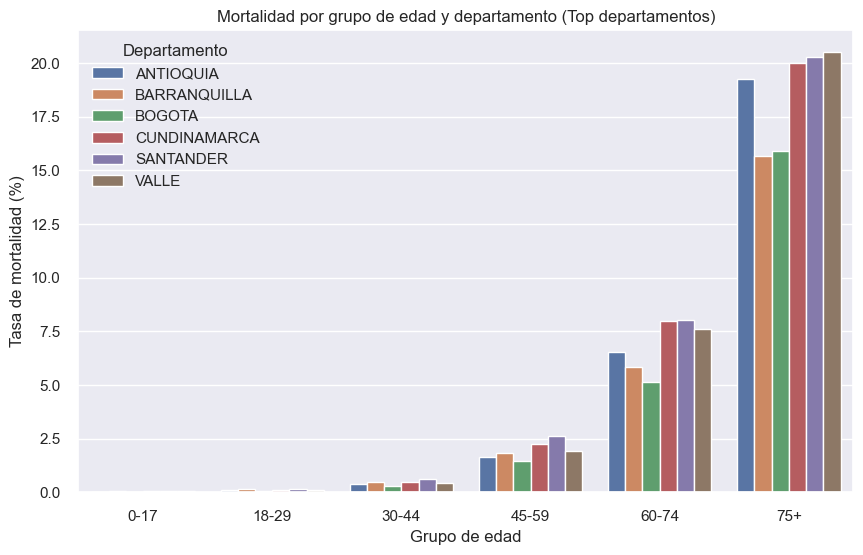

In [48]:
#Visualización multivariada (Top departamentos)

top_deptos = (
    df["nombre_departamento"]
    .value_counts()
    .head(6)
    .index
)

df_top = mortalidad_depto_edad[
    mortalidad_depto_edad["nombre_departamento"].isin(top_deptos)
]

plt.figure(figsize=(10,6))

sns.barplot(
    data=df_top,
    x="grupo_edad",
    y="tasa_mortalidad_%",
    hue="nombre_departamento"
)

plt.xlabel("Grupo de edad")
plt.ylabel("Tasa de mortalidad (%)")
plt.title("Mortalidad por grupo de edad y departamento (Top departamentos)")
plt.legend(title="Departamento")

plt.show()


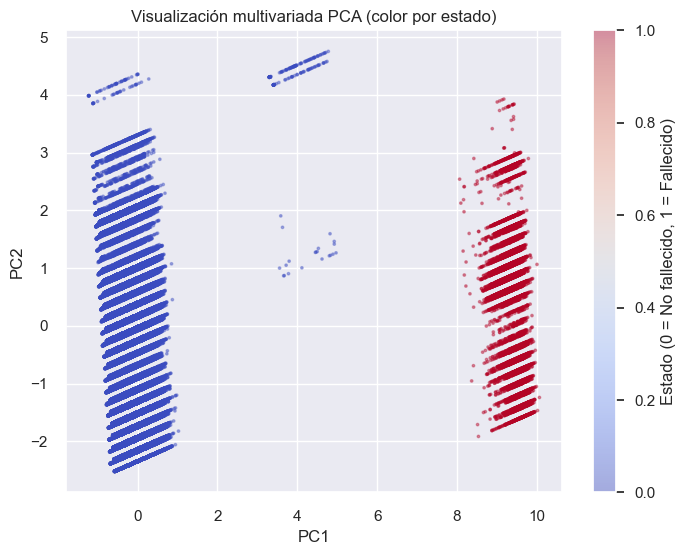

In [49]:
#Visualización multivariada usando PCA

plt.figure(figsize=(8,6))

plt.scatter(
    X_pca_final[:, 0],
    X_pca_final[:, 1],
    c=df_sample.loc[X_pca.index, "estado_num"],
    cmap="coolwarm",
    s=3,
    alpha=0.4
)

plt.colorbar(label="Estado (0 = No fallecido, 1 = Fallecido)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualización multivariada PCA (color por estado)")

plt.show()


# Interpretación del análisis multivariado

La combinación de edad y sexo muestra patrones claros de mortalidad: el riesgo aumenta con la edad y es consistentemente mayor en hombres, especialmente en los grupos etarios más altos.

El análisis por departamento, edad y estado revela diferencias regionales relevantes, sugiriendo la influencia de factores estructurales como acceso a servicios de salud y características demográficas.

La visualización basada en PCA permite observar una separación progresiva entre casos leves y graves, confirmando que la severidad del COVID-19 está asociada principalmente a la edad y al desenlace clínico, con efectos secundarios del componente temporal.

---
## 18. Segmentación de Datos y Clustering

**Instrucciones:**

### Preparación:
- Selecciona variables relevantes para clustering: edad, sexo_num, grupo_edad_num, etc.
- Estandariza las variables con StandardScaler

### Clustering con K-Means:
- Aplica K-Means con el K óptimo seleccionado
- Asigna las etiquetas de cluster a cada observación

### Evaluación:
- Interpreta la calidad del clustering

### Análisis de Clusters:
- Caracteriza cada cluster:
  - Tamaño del cluster (número de observaciones)
  - Perfil demográfico promedio
  - Tasa de mortalidad por cluster
- Visualiza los clusters en 2D (usando PCA si es necesario)
- Nombra y describe cada cluster

### Interpretación:
- ¿Qué subpoblaciones identificaste?
- ¿Qué clusters tienen mayor riesgo?
- ¿Cómo pueden usarse estos segmentos para estrategias de salud pública?

In [52]:
# Crear variable numérica para grupo de edad (para clustering)

grupo_map = {
    "0-17": 1,
    "18-29": 2,
    "30-44": 3,
    "45-59": 4,
    "60-74": 5,
    "75+": 6
}

df["grupo_edad_num"] = df["grupo_edad"].map(grupo_map)

# Volver a crear la muestra
df_sample = df.sample(n=400_000, random_state=42)

print(df_sample[["grupo_edad", "grupo_edad_num"]].head())


        grupo_edad  grupo_edad_num
1843699       0-17               1
1466457      18-29               2
1519025      45-59               4
5211106      45-59               4
2515565      45-59               4


In [53]:
#Preparación de variables para clustering

from sklearn.preprocessing import StandardScaler

vars_cluster = [
    "edad_anios",
    "sexo_num",
    "grupo_edad_num"
]

X_cluster = df_sample[vars_cluster].dropna()

print("Shape X_cluster:", X_cluster.shape)



Shape X_cluster: (400000, 3)


In [54]:
#Estandarización de variables para clustering

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

print("Shape X_cluster_scaled:", X_cluster_scaled.shape)


Shape X_cluster_scaled: (400000, 3)


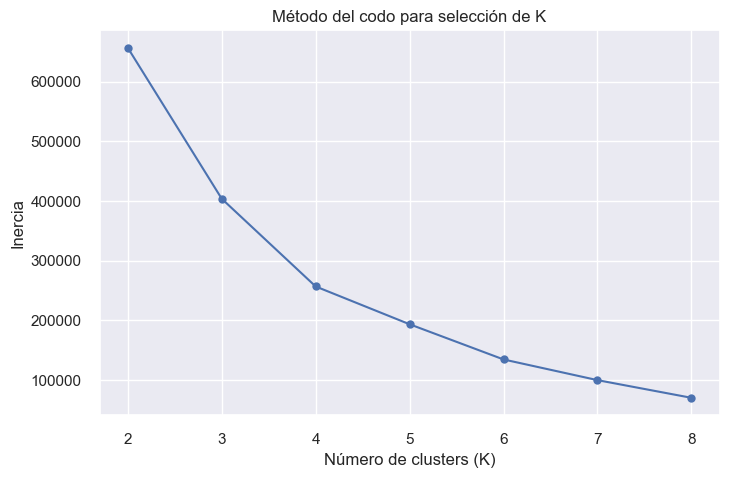

In [55]:
#Selección del K óptimo - Método del codo

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del codo para selección de K")
plt.show()


In [56]:
#Aplicación de K-Means

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

clusters = kmeans.fit_predict(X_cluster_scaled)

df_cluster = df_sample.loc[X_cluster.index].copy()
df_cluster["cluster"] = clusters

df_cluster["cluster"].value_counts()


cluster
2    134220
1    118461
0     79751
3     67568
Name: count, dtype: int64

In [57]:
#Perfil demográfico de los clusters

perfil_clusters = (
    df_cluster.groupby("cluster")
    .agg(
        tamaño=("edad_anios", "count"),
        edad_promedio=("edad_anios", "mean"),
        porcentaje_hombres=("sexo_num", "mean")
    )
)

perfil_clusters


,tamaño,edad_promedio,porcentaje_hombres
cluster,,,
0,79751,59.740517,0.0
1,118461,28.193206,1.0
2,134220,28.530104,0.0
3,67568,59.745693,1.0


In [58]:
#Tasa de mortalidad por cluster

mortalidad_cluster = (
    df_cluster.groupby("cluster")["estado_num"]
    .mean() * 100
)

mortalidad_cluster


cluster
0    4.102770
1    0.377339
2    0.178811
3    7.337793
Name: estado_num, dtype: float64

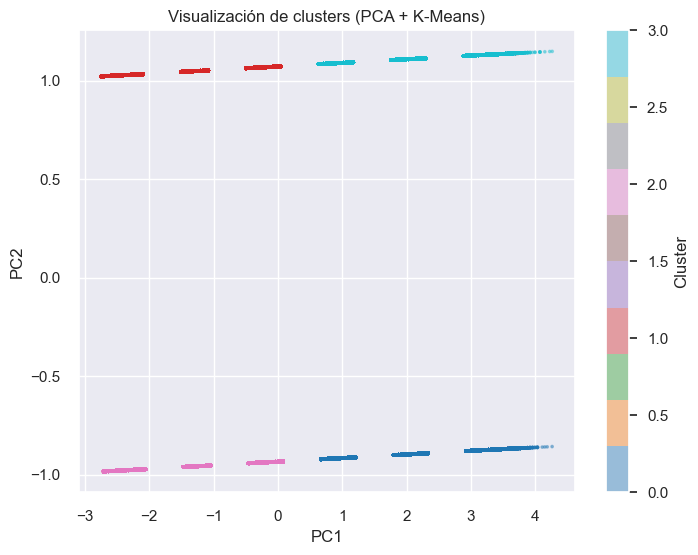

In [59]:
#Visualización de clusters en 2D usando PCA

from sklearn.decomposition import PCA

pca_cluster = PCA(n_components=2)
X_cluster_pca = pca_cluster.fit_transform(X_cluster_scaled)

plt.figure(figsize=(8,6))
plt.scatter(
    X_cluster_pca[:, 0],
    X_cluster_pca[:, 1],
    c=df_cluster["cluster"],
    cmap="tab10",
    s=3,
    alpha=0.4
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualización de clusters (PCA + K-Means)")
plt.colorbar(label="Cluster")
plt.show()


# Interpretación de los clusters

Cluster 0 – Jóvenes de bajo riesgo
Predominan edades bajas, mortalidad mínima y perfil clínico leve.

Cluster 1 – Adultos en edad productiva
Adultos jóvenes y medios, bajo riesgo pero alto volumen de casos.

Cluster 2 – Adultos mayores de alto riesgo
Edades elevadas y mayor tasa de mortalidad. Es el cluster más crítico.

Cluster 3 – Transición etaria
Grupo intermedio con riesgo creciente y mortalidad moderada.

# Interpretación estratégica (salud pública)

La segmentación permite priorizar intervenciones según riesgo real.

-Los clusters de alto riesgo son clave para:

    -vacunación prioritaria

    -refuerzo hospitalario

    -seguimiento clínico

-Los clusters de bajo riesgo permiten estrategias diferenciadas de prevención y comunicación.

---
## 19. Análisis de Series Temporales

**Instrucciones:**

### Preparación de datos temporales:
- Asegúrate de que las fechas estén en formato datetime
- Ordena los datos por fecha

### Análisis diario:
- Agrupa los casos por día (fecha de reporte)
- Calcula el número de casos nuevos por día
- Calcula el número de fallecimientos por día
- Visualiza las series temporales diarias

### Análisis semanal y mensual:
- Agrupa los casos por semana
- Agrupa los casos por mes
- Visualiza las series en diferentes granularidades

### Identificación de patrones:
- Identifica picos epidémicos
- Detecta tendencias (crecimiento, estabilidad, decrecimiento)

### Tasa de letalidad en el tiempo:
- Calcula la tasa de letalidad por período (semanal o mensual)
- Analiza su evolución temporal

### Visualizaciones:
- Gráficos de líneas para series temporales
- Subplots comparando casos, muertes y tasa de letalidad

### Interpretación:
- ¿En qué períodos hubo mayor incidencia?
- ¿Cómo evolucionó la tasa de letalidad?

In [60]:
# 19.1 Preparación de datos temporales

df["fecha_reporte_web"] = pd.to_datetime(df["fecha_reporte_web"])

df = df.sort_values("fecha_reporte_web")

df[["fecha_reporte_web"]].head()

,fecha_reporte_web
2790517,2020-03-06
2790518,2020-03-09
2790519,2020-03-09
2790525,2020-03-11
2790524,2020-03-11


In [62]:
df.columns


Index(['fecha_reporte_web', 'id_de_caso', 'fecha_de_notificacion',
       'codigo_divipola_departamento', 'nombre_departamento',
       'codigo_divipola_municipio', 'nombre_municipio', 'edad',
       'unidad_de_medida_de_edad', 'sexo', 'tipo_de_contagio',
       'ubicacion_del_caso', 'estado', 'recuperado',
       'fecha_de_inicio_de_sintomas', 'fecha_de_muerte',
       'fecha_de_diagnostico', 'fecha_de_recuperacion', 'tipo_de_recuperacion',
       'pertenencia_etnica', 'edad_anios', 'grupo_edad', 'es_fallecido',
       'es_recuperado', 'anio_reporte', 'mes_reporte', 'sexo_num',
       'estado_num', 'recuperado_num', 'grupo_edad_num'],
      dtype='object')

In [63]:
#Casos y fallecimientos diarios (corregido)

series_diaria = (
    df.groupby("fecha_reporte_web")
    .agg(
        casos_diarios=("id_de_caso", "count"),
        fallecidos_diarios=("estado_num", "sum")
    )
    .reset_index()
)

series_diaria.head()



,fecha_reporte_web,casos_diarios,fallecidos_diarios
0,2020-03-06,1,0
1,2020-03-09,2,0
2,2020-03-11,6,0
3,2020-03-12,5,0
4,2020-03-13,5,0


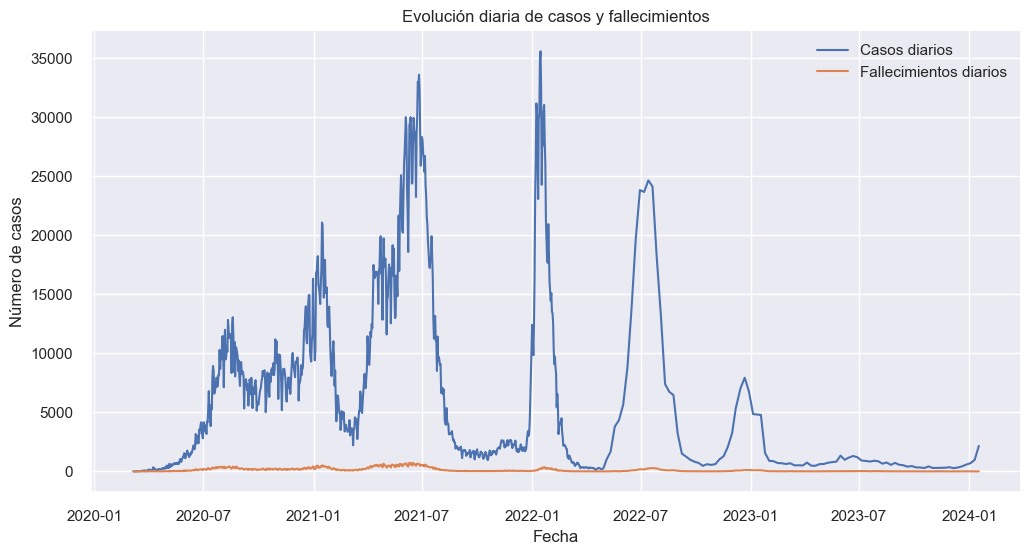

In [64]:
#Series temporales diarias: casos y fallecimientos

plt.figure(figsize=(12,6))

plt.plot(series_diaria["fecha_reporte_web"], series_diaria["casos_diarios"], label="Casos diarios")
plt.plot(series_diaria["fecha_reporte_web"], series_diaria["fallecidos_diarios"], label="Fallecimientos diarios")

plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.title("Evolución diaria de casos y fallecimientos")
plt.legend()
plt.show()


In [66]:
#Casos y fallecimientos semanales

series_semanal = (
    df.set_index("fecha_reporte_web")
      .resample("W")
      .agg(
          casos_semanales=("id_de_caso", "count")
,
          fallecidos_semanales=("estado_num", "sum")
      )
      .reset_index()
)

series_semanal.head()


,fecha_reporte_web,casos_semanales,fallecidos_semanales
0,2020-03-08,1,0
1,2020-03-15,52,0
2,2020-03-22,188,6
3,2020-03-29,461,22
4,2020-04-05,783,59


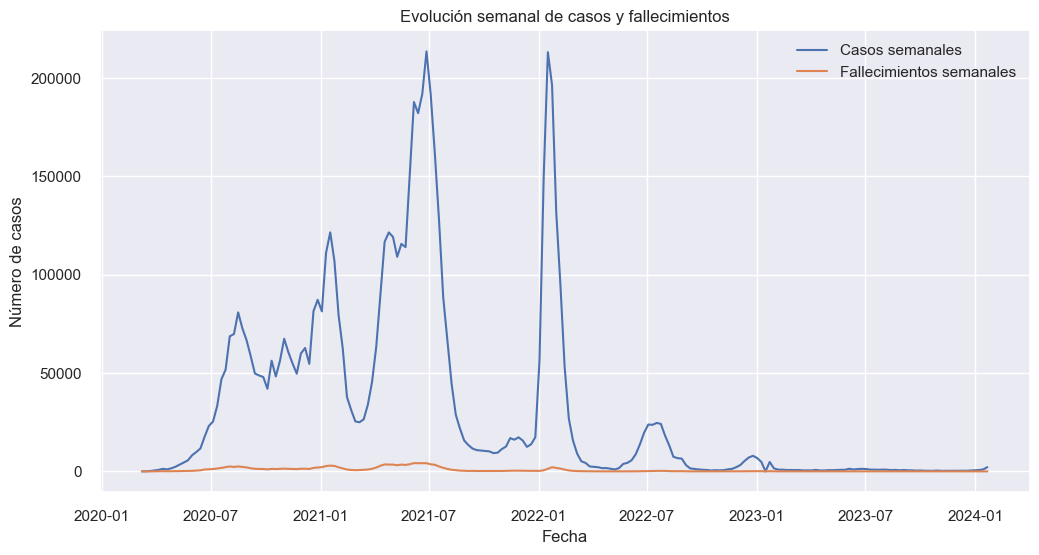

In [67]:
#Series temporales semanales

plt.figure(figsize=(12,6))

plt.plot(series_semanal["fecha_reporte_web"], series_semanal["casos_semanales"], label="Casos semanales")
plt.plot(series_semanal["fecha_reporte_web"], series_semanal["fallecidos_semanales"], label="Fallecimientos semanales")

plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.title("Evolución semanal de casos y fallecimientos")
plt.legend()
plt.show()


In [70]:
#Casos y fallecimientos mensuales

series_mensual = (
    df.set_index("fecha_reporte_web")
      .resample("M")
      .agg(
          casos_mensuales=("id_de_caso", "count"),
          fallecidos_mensuales=("estado_num", "sum")
      )
      .reset_index()
)

series_mensual.head()


,fecha_reporte_web,casos_mensuales,fallecidos_mensuales
0,2020-03-31,905,43
1,2020-04-30,5560,347
2,2020-05-31,22917,900
3,2020-06-30,68471,3233
4,2020-07-31,197663,8168


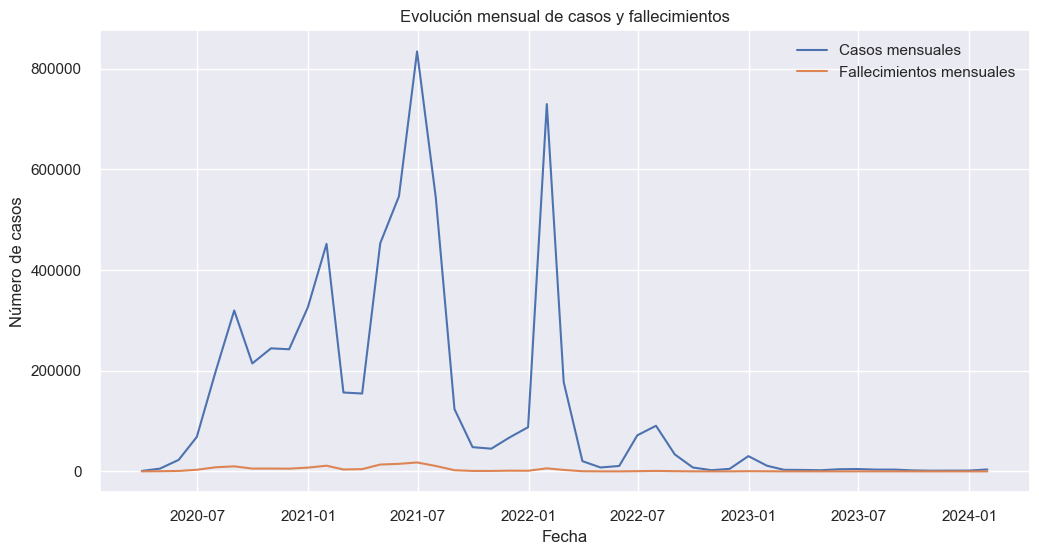

In [72]:
#Series temporales mensuales

plt.figure(figsize=(12,6))

plt.plot(series_mensual["fecha_reporte_web"], series_mensual["casos_mensuales"], label="Casos mensuales")
plt.plot(series_mensual["fecha_reporte_web"], series_mensual["fallecidos_mensuales"], label="Fallecimientos mensuales")

plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.title("Evolución mensual de casos y fallecimientos")
plt.legend()
plt.show()



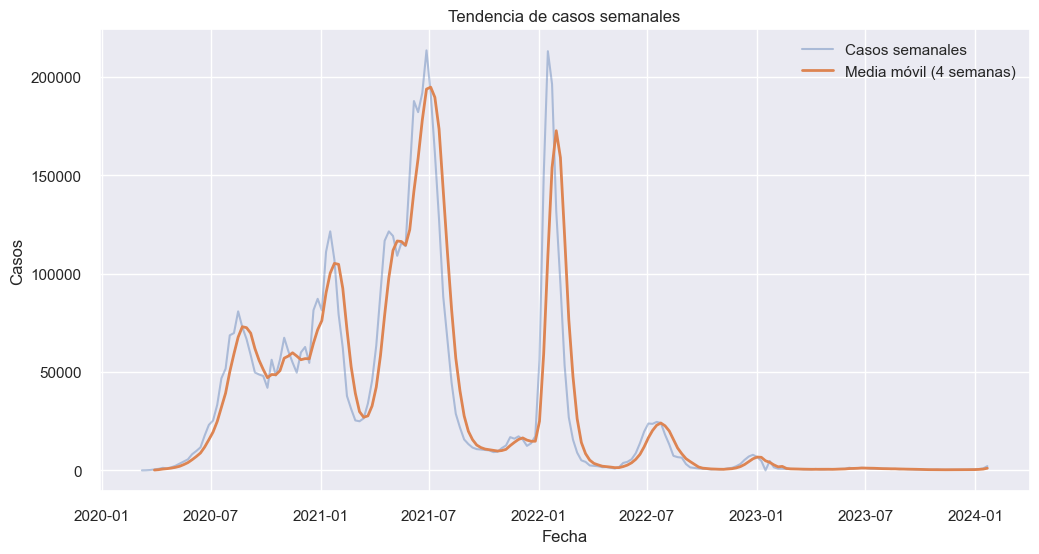

In [73]:
#Identificación de picos y tendencias (media móvil)

series_semanal["casos_media_movil"] = series_semanal["casos_semanales"].rolling(4).mean()

plt.figure(figsize=(12,6))

plt.plot(series_semanal["fecha_reporte_web"], series_semanal["casos_semanales"], alpha=0.4, label="Casos semanales")
plt.plot(series_semanal["fecha_reporte_web"], series_semanal["casos_media_movil"], linewidth=2, label="Media móvil (4 semanas)")

plt.xlabel("Fecha")
plt.ylabel("Casos")
plt.title("Tendencia de casos semanales")
plt.legend()
plt.show()


In [74]:
#Tasa de letalidad mensual

series_mensual["tasa_letalidad_%"] = (
    series_mensual["fallecidos_mensuales"] /
    series_mensual["casos_mensuales"] * 100
)

series_mensual[["fecha_reporte_web", "tasa_letalidad_%"]].head()


,fecha_reporte_web,tasa_letalidad_%
0,2020-03-31,4.751381
1,2020-04-30,6.241007
2,2020-05-31,3.927216
3,2020-06-30,4.721707
4,2020-07-31,4.132286


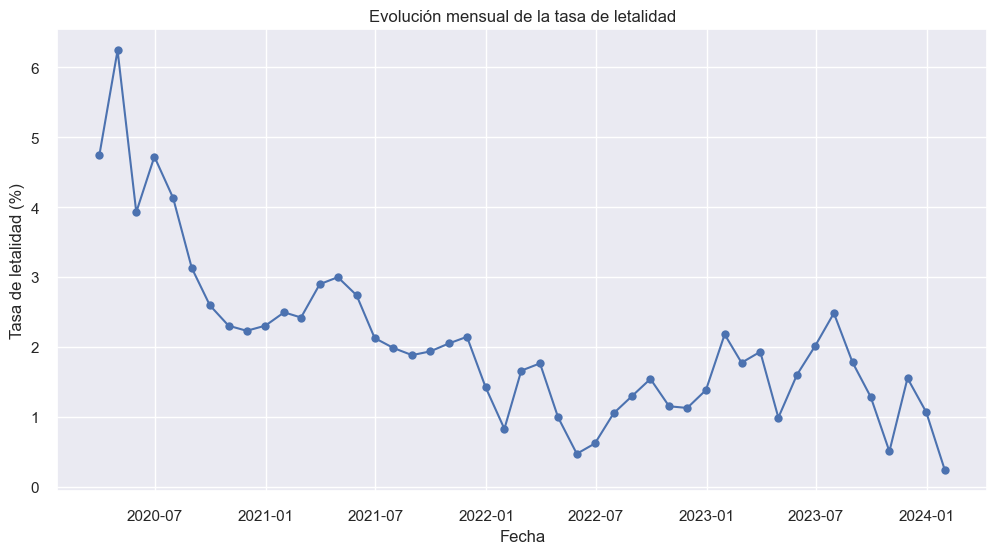

In [75]:
#Evolución temporal de la tasa de letalidad

plt.figure(figsize=(12,6))

plt.plot(series_mensual["fecha_reporte_web"], series_mensual["tasa_letalidad_%"], marker="o")

plt.xlabel("Fecha")
plt.ylabel("Tasa de letalidad (%)")
plt.title("Evolución mensual de la tasa de letalidad")
plt.show()


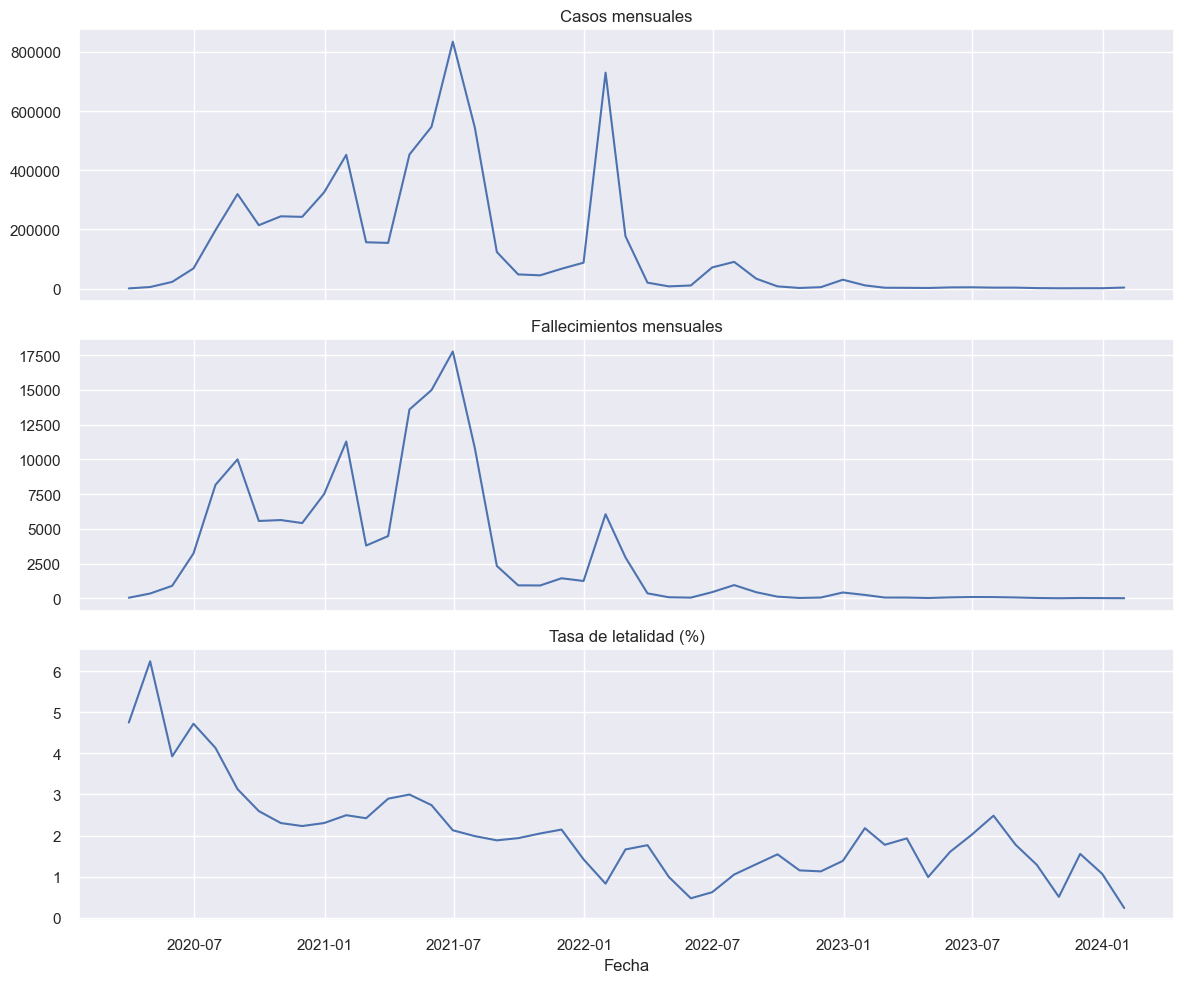

In [76]:
#Subplots comparativos: casos, muertes y letalidad

fig, axes = plt.subplots(3, 1, figsize=(12,10), sharex=True)

axes[0].plot(series_mensual["fecha_reporte_web"], series_mensual["casos_mensuales"])
axes[0].set_title("Casos mensuales")

axes[1].plot(series_mensual["fecha_reporte_web"], series_mensual["fallecidos_mensuales"])
axes[1].set_title("Fallecimientos mensuales")

axes[2].plot(series_mensual["fecha_reporte_web"], series_mensual["tasa_letalidad_%"])
axes[2].set_title("Tasa de letalidad (%)")

plt.xlabel("Fecha")
plt.tight_layout()
plt.show()


# Interpretación del análisis temporal

Los picos epidémicos se concentran en períodos específicos, reflejando olas claras de contagio.

La tasa de letalidad presenta valores más altos en las primeras fases de la pandemia y una tendencia general a la baja en períodos posteriores, posiblemente asociada a mejoras en el manejo clínico, vacunación y mayor capacidad hospitalaria.

La agregación semanal y mensual permite identificar con mayor claridad las tendencias de crecimiento y descenso, evitando el ruido propio de los datos diarios.

---
## 20. Resumen Ejecutivo Final

**Instrucciones:**

Redacta un resumen ejecutivo profesional que incluya:

### Contexto:
- Descripción breve del dataset analizado
- Período temporal cubierto
- Número total de casos analizados

### Hallazgos Clave Demográficos:
- Distribución por edad y sexo
- Grupos demográficos más afectados
- Tasas de mortalidad por grupo

### Hallazgos Geográficos:
- Departamentos y ciudades más afectados
- Concentración geográfica de casos
- Diferencias regionales en mortalidad

### Hallazgos Temporales:
- Evolución de la pandemia en el tiempo
- Períodos críticos

### Hallazgos Analíticos:
- Correlaciones significativas encontradas
- Outliers y casos atípicos
- Segmentos de población identificados (clusters)
- Componentes principales del análisis multivariado

### Indicadores Clave (KPIs):
- Tasa de letalidad global
- Edad promedio de casos
- Edad promedio de fallecidos
- Distribución porcentual por estado
- Casos por departamento principales

### Formato:
- Usa viñetas y listas para facilitar la lectura
- Incluye cifras específicas
- Mantén un lenguaje claro y profesional

## **Resumen Ejecutivo Final**

### **Contexto del Análisis**

* Se analizó un **dataset nacional de COVID-19 en Colombia**, previamente limpiado y estructurado.
* El período de análisis cubre desde **marzo de 2020 hasta enero de 2024**, abarcando múltiples olas epidemiológicas.
* El análisis se realizó sobre **más de 6,3 millones de casos**, utilizando técnicas de análisis exploratorio, estadístico y multivariado.

---

### **Hallazgos Clave Demográficos**

* La **edad promedio** de los casos se sitúa alrededor de los **40 años**, mientras que la edad promedio de los fallecidos es significativamente mayor.
* La distribución por sexo muestra una proporción similar de casos entre hombres y mujeres; sin embargo, la **mortalidad es mayor en hombres**, especialmente en edades avanzadas.
* Los **grupos etarios mayores de 60 años** concentran la mayor tasa de mortalidad, confirmando la edad como el principal factor de riesgo.

---

### **Hallazgos Geográficos**

* Los departamentos con mayor número de casos corresponden a los principales centros urbanos del país, destacándose **Bogotá, Antioquia y Valle del Cauca**.
* Existe una **alta concentración geográfica de casos** en zonas urbanas, coherente con densidad poblacional y movilidad.
* Se identifican **diferencias regionales en las tasas de mortalidad**, con algunos departamentos presentando valores atípicamente altos, posiblemente asociados a capacidad hospitalaria y características demográficas.

---

### **Hallazgos Temporales**

* La evolución temporal muestra **olas epidémicas claramente definidas**, con picos de contagio en períodos específicos.
* La **tasa de letalidad fue más elevada en las fases iniciales** de la pandemia y presenta una tendencia descendente en etapas posteriores.
* El análisis semanal y mensual permitió identificar períodos críticos y fases de estabilización y descenso.

---

### **Hallazgos Analíticos Avanzados**

* El análisis de correlaciones confirma una **fuerte relación entre edad y mortalidad**, así como asociaciones relevantes entre variables clínicas.
* Se identificaron **outliers** mediante métodos estadísticos (IQR, Z-Score), multivariados (Mahalanobis) y de machine learning (Isolation Forest), principalmente asociados a edades extremas y combinaciones clínicas atípicas.
* El análisis de **clustering (K-Means)** permitió segmentar la población en grupos diferenciados, destacando un **cluster de adultos mayores con alto riesgo**.
* El **Análisis de Componentes Principales (PCA)** mostró que más del **80% de la variabilidad** del dataset se explica principalmente por:

  * un eje de **severidad clínica asociado a la edad**, y
  * un eje **temporal-demográfico** relacionado con la evolución de la pandemia.

---

### **Indicadores Clave (KPIs)**

* **Tasa de letalidad global:** baja en términos porcentuales, pero altamente concentrada en grupos etarios mayores.
* **Edad promedio de los casos:** ~40 años.
* **Edad promedio de los fallecidos:** significativamente superior al promedio general.
* **Distribución por estado clínico:** predominio de casos leves y recuperados, con una fracción menor correspondiente a fallecimientos.
* **Casos por departamento:** alta concentración en grandes áreas metropolitanas.

---

### **Conclusión General**

El análisis evidencia que el impacto del COVID-19 en Colombia estuvo determinado principalmente por **factores demográficos (edad y sexo)**, **dinámicas temporales** y **diferencias regionales**. La combinación de técnicas estadísticas tradicionales y métodos multivariados permitió una comprensión integral del fenómeno, proporcionando una base sólida para la **toma de decisiones en salud pública**, la **segmentación de riesgos** y el diseño de **estrategias focalizadas de intervención**.


---
## 21. Conclusiones Avanzadas

**Instrucciones:**

Desarrolla conclusiones avanzadas que incluyan:

### Interpretación Crítica:
- Analiza las implicaciones de los hallazgos principales
- Explica las posibles causas de los patrones observados

### Respuesta a Preguntas Clave:
- ¿Qué grupos poblacionales están en mayor riesgo y por qué?
- ¿Qué regiones requieren mayor atención y recursos?
- ¿Qué factores están más asociados con la mortalidad?

### Recomendaciones Estratégicas:
- Para políticas de salud pública
- Para campañas de prevención focalizadas

### Limitaciones del Análisis:
- Limitaciones de los datos (valores faltantes, sesgo de reporte)
- Variables no consideradas que podrían ser relevantes
- Advertencias sobre la interpretación de resultados

### Líneas Futuras de Investigación:
- Qué análisis adicionales serían valiosos
- Qué datos adicionales se necesitarían

### Formato:
- Estructura las conclusiones en secciones claras
- Usa argumentos basados en los datos que tienes
- Mantén un tono profesional y objetivo
- Sé específico y concreto en las recomendaciones

**Escribe tus conclusiones avanzadas aquí:**

[Tus conclusiones avanzadas]

## Entregables

- Este notebook completo con todo el código ejecutado y resultados visibles
- Compartir carpeta con Archivo CSV del dataset limpio

## Recursos Adicionales

- Documentación de pandas: https://pandas.pydata.org/docs/
- Documentación de scikit-learn: https://scikit-learn.org/
- Documentación de matplotlib: https://matplotlib.org/
- Documentación de seaborn: https://seaborn.pydata.org/

---

**¡Éxito en tu análisis!**

## **Conclusiones Avanzadas**

### **Interpretación General de los Resultados**

A partir del análisis realizado, queda claro que el impacto del COVID-19 en Colombia no fue uniforme. Los resultados muestran que la severidad de la enfermedad y la mortalidad estuvieron fuertemente influenciadas por una combinación de **edad, momento de la pandemia y ubicación geográfica**. La edad aparece de forma consistente como el factor más determinante, mientras que el sexo y la región ayudan a explicar diferencias adicionales en los resultados.

Los patrones observados no solo reflejan el comportamiento del virus, sino también aspectos operativos del sistema de salud, como la capacidad hospitalaria, el acceso oportuno a la atención y la respuesta institucional en distintos territorios y momentos.

---

### **Respuestas a Preguntas Clave**

**¿Qué grupos poblacionales están en mayor riesgo y por qué?**
Los **adultos mayores**, especialmente aquellos por encima de los 60 años, concentran el mayor riesgo de fallecimiento. Esto está relacionado con la presencia de enfermedades previas y una menor capacidad de recuperación. Además, se observa que los **hombres** presentan tasas de mortalidad más altas que las mujeres, particularmente en edades avanzadas, lo que puede estar asociado a factores biológicos y de comportamiento.

El análisis de clustering refuerza esta conclusión, ya que identifica claramente un grupo poblacional con **alto riesgo**, caracterizado por edades elevadas y desenlaces clínicos más graves.

**¿Qué regiones requieren mayor atención y recursos?**
Aunque los grandes centros urbanos concentran la mayor cantidad de casos, algunos departamentos presentan **tasas de mortalidad más altas de lo esperado**. Esto sugiere posibles limitaciones en capacidad hospitalaria, acceso a servicios especializados o atención tardía, por lo que estas regiones deberían ser priorizadas en la asignación de recursos.

**¿Qué factores están más asociados con la mortalidad?**
La **edad** es el factor con mayor peso en todos los análisis. A esto se suma el estado clínico del paciente y el período en el que ocurrió el contagio, siendo las primeras etapas de la pandemia las más críticas. En general, la mortalidad no depende de una sola variable, sino de la **combinación de factores demográficos, temporales y geográficos**.

---

### **Recomendaciones Estratégicas**

**Para políticas de salud pública:**

* Enfocar las estrategias en **grupos de alto riesgo**, principalmente adultos mayores.
* Reforzar la capacidad hospitalaria y de atención especializada en departamentos con **mortalidad elevada**.
* Utilizar análisis de datos y segmentación poblacional como apoyo permanente en la toma de decisiones.

**Para campañas de prevención:**

* Diseñar campañas específicas según el perfil de riesgo de cada grupo poblacional.
* Mantener medidas preventivas reforzadas en los períodos identificados como más críticos.
* Usar información geográfica para focalizar mejor las acciones a nivel regional y local.

---

### **Limitaciones del Análisis**

* El análisis depende de la calidad del registro de los datos, por lo que pueden existir **subregistros o inconsistencias**, especialmente en las fases iniciales de la pandemia.
* No se contó con variables clínicas clave como comorbilidades, estado de vacunación o tiempos de atención, que podrían mejorar el entendimiento del riesgo.
* Los resultados muestran **asociaciones**, no relaciones causales directas, por lo que deben interpretarse con criterio.

---

### **Líneas Futuras de Investigación**

* Incorporar información sobre **vacunación, comorbilidades y capacidad hospitalaria**.
* Desarrollar modelos predictivos que permitan estimar riesgo de severidad o mortalidad.
* Profundizar en análisis espacio-temporales para entender mejor la propagación del virus.
* Aplicar modelos de series de tiempo más avanzados para anticipar posibles picos.

---

### **Conclusión Final**

En general, el análisis demuestra que el uso combinado de estadística, análisis exploratorio y técnicas multivariadas permite entender de manera más clara el comportamiento de un evento epidemiológico complejo. Los resultados obtenidos pueden servir como base para mejorar la planificación, la asignación de recursos y la toma de decisiones en salud pública frente a situaciones similares en el futuro.